# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from sklearn.svm import SVC

# Load All Datasets

In [2]:
# Main X and Y data
x_train = pd.read_csv('Data/x_train_gr_smpl.csv')
y_train = pd.read_csv('Data/y_train_smpl.csv')


print(x_train.shape, y_train.shape)

(9690, 2304) (9690, 1)


# 10-Fold Cross Validation Linear Classifier Function

In [3]:
def linear_classifier(x_train, y_train):
    
    y_train = np.array(y_train).flatten()
    
    model = SVC()
    model.fit(x_train, y_train)

    scores = cross_val_score(model, x_train, y_train, cv=2)
    np.set_printoptions(precision=2)
    
    return print('Scores: ',scores, ' Mean Score: ', np.round(scores.mean(), 2))

In [4]:
linear_classifier(x_train, y_train)

Scores:  [0.63 0.61]  Mean Score:  0.62


# 10-Fold Cross Validation on Training Data using a Neural Network Function

In [5]:
def neural_network(hidden_layers, neurons, l_rate, epochs, momentum):
    x_train = pd.read_csv('Data/x_train_gr_smpl.csv')
    y_train = pd.read_csv('Data/y_train_smpl.csv')

    x_train = x_train/255
    
    acc_per_fold = []
    loss_per_fold = []
    
    
    kfold = KFold(n_splits=10, shuffle=True)
    fold_no = 1
    
    for train, test in kfold.split(x_train, y_train):
        # Neural Network Model
        model = Sequential()
        model.add(Dense(2304, input_dim = 2304, activation='relu'))

        for i in range(hidden_layers):
            model.add(Dense(units=neurons, activation='relu'))

        model.add(Dense(units=10, activation='softmax'))

        opt = SGD(learning_rate=l_rate, momentum=momentum) 
        model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        
        print('-----------------------------------------------------------------------------------------------------------')
        print('-----------------------------------------------------------------------------------------------------------')
        print(f'Training for fold {fold_no} ...')
        
        x_train = x_train.reindex(index=range(len(x_train)))
        y_train = y_train.reindex(index=range(len(x_train)))
        
        model.fit(x_train.iloc[train], y_train.iloc[train], epochs=epochs)
        
        scores = model.evaluate(x_train.iloc[test], y_train.iloc[test])
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

        fold_no = fold_no + 1
        
        y_pred = np.argmax(model.predict(x_train.iloc[test], verbose=0), axis=-1)
        
        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        
        # Analyzing the results
        # Confusion Matrix
        cm = metrics.confusion_matrix(y_train.iloc[test], y_pred)
        print('Confusion Matrix:')
        print(cm)
        print('\n')

        # True Positive
        TP = np.diag(cm)
        # False Positive
        FP = cm.sum(axis=0) - TP
        # False Negative
        FN = cm.sum(axis=1) - TP
        # True Negative
        TN = cm.sum() - (FP+FN+TP)

        #True Positive Rate
        TPR = TP/(TP+FN)
        TPR_mean = np.round(TPR.mean(), 2)
        #False Positive Rate
        FPR = FP/(FP+TN)
        FPR_mean = np.round(FPR.mean(), 2)
        #Precision
        Precision = TP/(TP+FP)
        Precision_mean = np.round(Precision.mean(), 2)
        #Recall
        Recall = TP/(TP+FN)
        Recall_mean = np.round(Recall.mean(), 2)
        #F1 Measure
        F1 = 2 * (Precision * Recall) / (Precision + Recall)
        F1_mean = np.round(F1.mean(), 2)

        np.set_printoptions(precision=2)

        print('TP rate: ', TPR)
        print('Mean TP rate: ', TPR_mean)
        print('FP rate: ', FPR)
        print('Mean FP rate: ', FPR_mean)
        print('Precision: ', Precision)
        print('Mean Precision: ', Precision_mean)
        print('Recall: ', Recall)
        print('Mean Recall: ', Recall_mean)
        print('F Measure: ', F1)
        print('Mean F Measure: ', F1_mean)
        print('\n')

        print('Classification Report:')
        print(metrics.classification_report(y_train.iloc[test], y_pred))

        # Visualizing the results
        # Heatmap
        print('\n')
        print('\n')
        print('Visualization of Results')
        plt.figure(figsize=(11,7))
        sns.heatmap(cm, annot=True, fmt=' .0f', square=True, cmap='tab20b')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Heatmap of Confusion Matrix')


        plt.figure(figsize=(8,4))
        plt.scatter(Precision, Recall, c='purple')
        plt.xlabel('Precsion')
        plt.ylabel('Recall')
        plt.title('Precision vs Recall Scatter Chart')
        plt.show()
        
        print('\n')
        print('-----------------------------------------------------------------------------------------------------------')
        print('-----------------------------------------------------------------------------------------------------------')
        print('\n')

    
    print('-----------------------------------------------------------------------------------------------------------')
    print('Score per fold: ')
    for i in range(0, len(acc_per_fold)):
        print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
        print('-----------------------------------------------------------------------------------------------------------')
    print('Average scores for all folds: ')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
    print('-----------------------------------------------------------------------------------------------------------')

# Varying the Neural Network Parameters

# Hidden Layers (Other Parameterss remain Constant)

# 1 Hidden Layer

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4009 - accuracy: 0.4981
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8038 - accuracy: 0.7239
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6017 - accuracy: 0.8021
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5209 - accuracy: 0.8288
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.8060
Score for fold 1: loss of 0.6013858318328857; accuracy of 80.59855699539185%
Confusion Matrix:
[[  4   4   0   0  20   0   0   0   0   0]
 [  0 176   6   0  28   0   0   1   0   0]
 [  0  18 186   0  30   0   0   1   0   0]
 [  0   9  19 110   5   0   0   0   0  

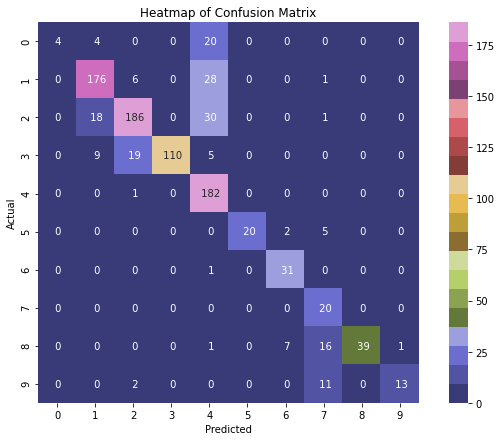

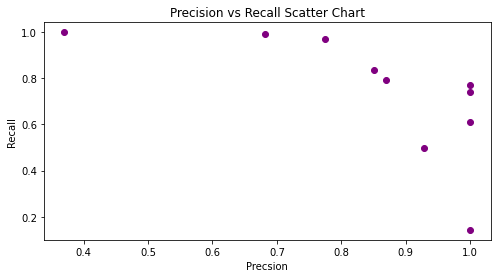



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.3411 - accuracy: 0.5139
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8315 - accuracy: 0.7216
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6746 - accuracy: 0.7786
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.4941 - accuracy: 0.8341
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.8874 - accuracy: 0.6976
Score for fold 2: loss of 0.887449562549591

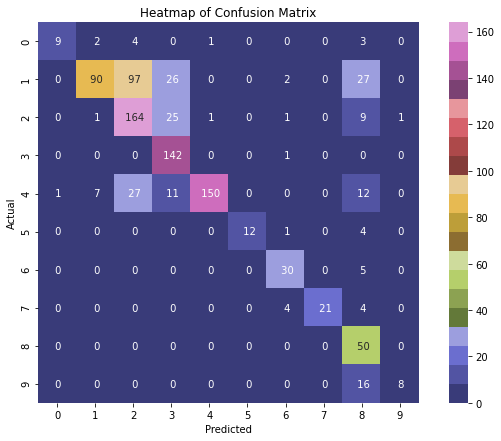

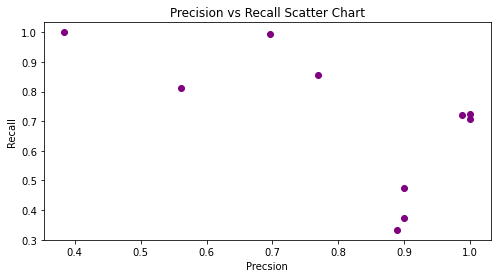



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.3793 - accuracy: 0.5074
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8678 - accuracy: 0.7046
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6422 - accuracy: 0.7833
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.4920 - accuracy: 0.8296
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.8462
Score for fold 3: loss of 0.453826040029525

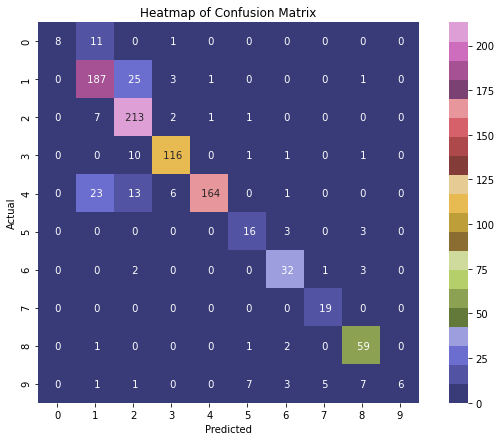

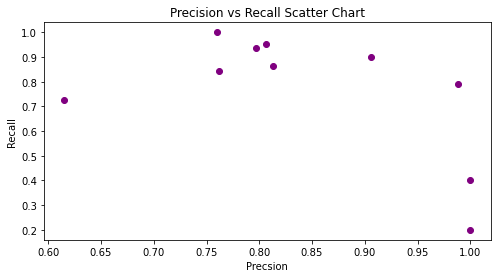



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4203 - accuracy: 0.4783
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8919 - accuracy: 0.6927
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6308 - accuracy: 0.7856
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.4993 - accuracy: 0.8316
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.8555
Score for fold 4: loss of 0.392293035984039

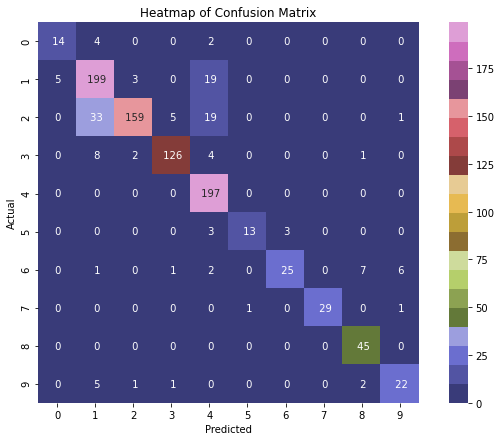

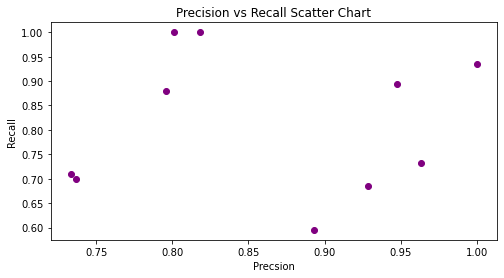



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4700 - accuracy: 0.4706
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9384 - accuracy: 0.6786
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7563 - accuracy: 0.7428
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5432 - accuracy: 0.8211
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8803
Score for fold 5: loss of 0.420991331338882

<ipython-input-5-cc40ee183db9>:69: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


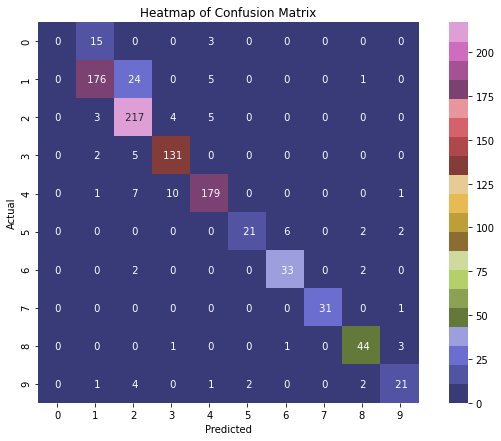

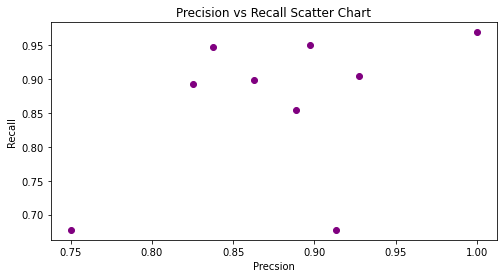



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4185 - accuracy: 0.4831
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8426 - accuracy: 0.7128
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6227 - accuracy: 0.7950
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5351 - accuracy: 0.8214
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.8483
Score for fold 6: loss of 0.434266895055770

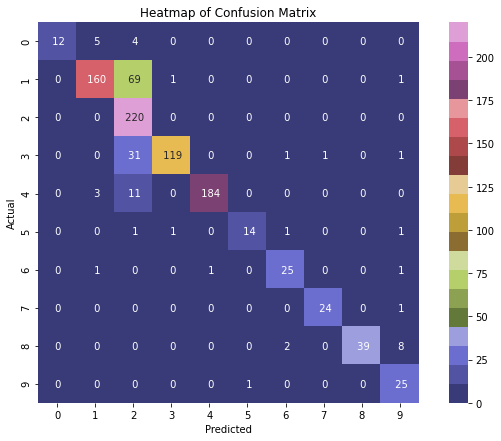

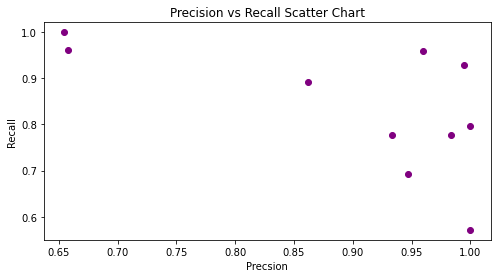



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.3568 - accuracy: 0.5134
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8650 - accuracy: 0.7023
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5931 - accuracy: 0.8038
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5698 - accuracy: 0.8047
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8576
Score for fold 7: loss of 0.393522381782531

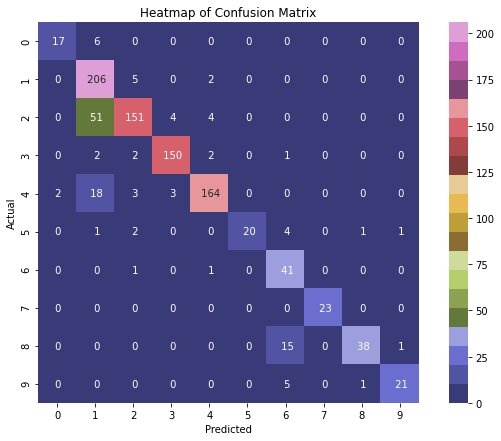

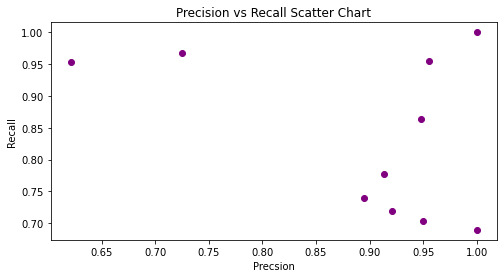



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4087 - accuracy: 0.4935
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8578 - accuracy: 0.7078
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6137 - accuracy: 0.7996
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.4990 - accuracy: 0.8295
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.9040
Score for fold 8: loss of 0.327188193798065

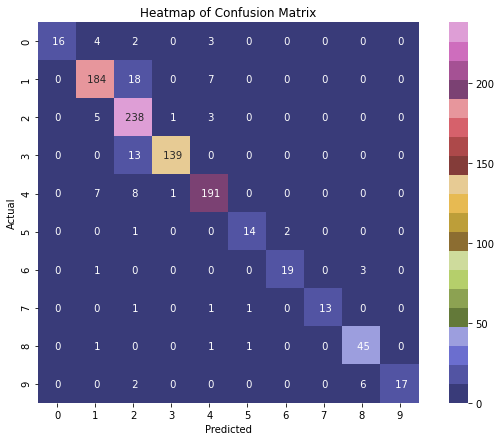

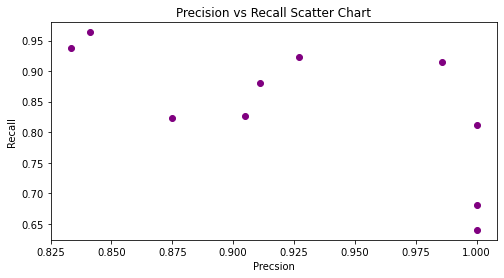



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4274 - accuracy: 0.4855
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8644 - accuracy: 0.6992
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6974 - accuracy: 0.7687
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5531 - accuracy: 0.8146
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3023 - accuracy: 0.8937
Score for fold 9: loss of 0.302335500717163

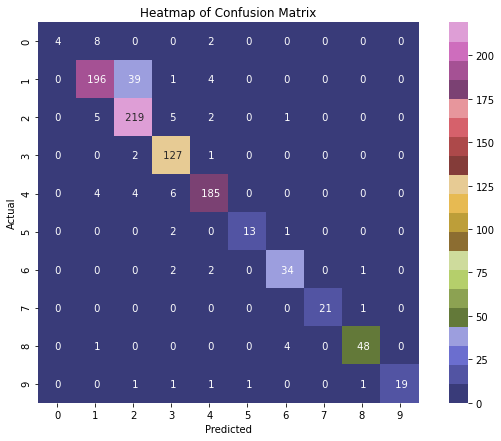

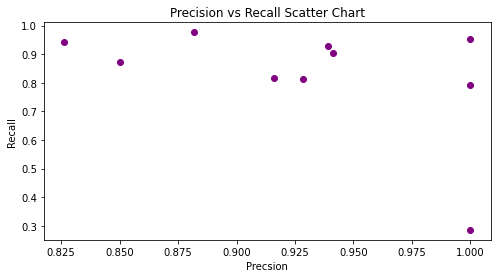



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4034 - accuracy: 0.4881
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8165 - accuracy: 0.7188
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6226 - accuracy: 0.7931
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5337 - accuracy: 0.8255
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4496 - accuracy: 0.8442
Score for fold 10: loss of 0.4495647549629

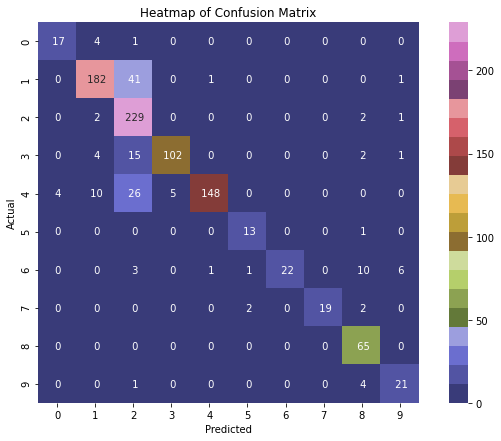

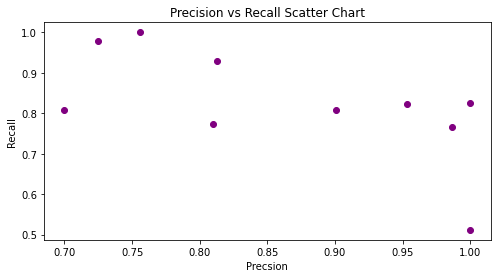



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.6013858318328857 - Accuracy: 80.59855699539185%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.8874495625495911 - Accuracy: 69.76264119148254%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.45382604002952576 - Accuracy: 84.62332487106323%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.3922930359840393 - Accuracy: 85.55211424827576%
--------------------------------------------------------------

In [6]:
neural_network(hidden_layers=1, neurons=100, l_rate=0.01, epochs=5, momentum=0.9)

# 2 Hidden Layers

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4554 - accuracy: 0.4613
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9419 - accuracy: 0.6707
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6775 - accuracy: 0.7630
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5184 - accuracy: 0.8207
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.8504
Score for fold 1: loss of 0.4559401273727417; accuracy of 85.0361168384552%
Confusion Matrix:
[[  9  12   0   0   0   0   0   0   0   0]
 [  0 220   5   0   3   0   0   0   0   0]
 [  0  34 168   7   5   0   0   1   0   1]
 [  0   9   0 116   0   0   0   0   0   

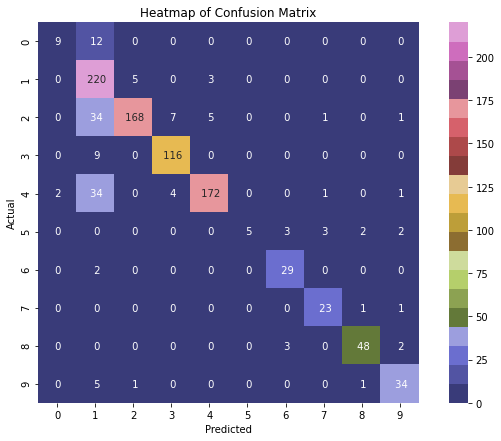

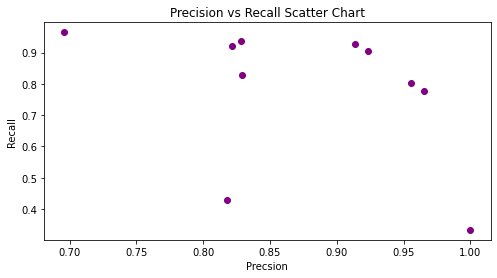



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4423 - accuracy: 0.4512
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8873 - accuracy: 0.6818
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6670 - accuracy: 0.7689
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5352 - accuracy: 0.8090
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.8204
Score for fold 2: loss of 0.622618496417999

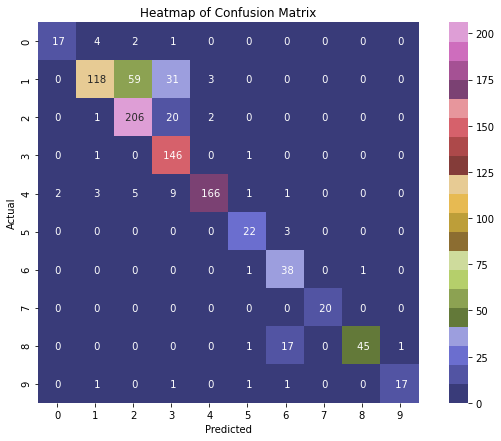

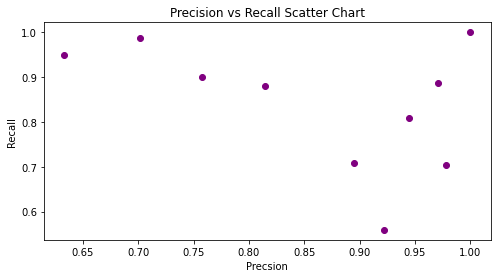



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4514 - accuracy: 0.4651
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9170 - accuracy: 0.6722
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6793 - accuracy: 0.7598
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5173 - accuracy: 0.8220
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3808 - accuracy: 0.8545
Score for fold 3: loss of 0.380834221839904

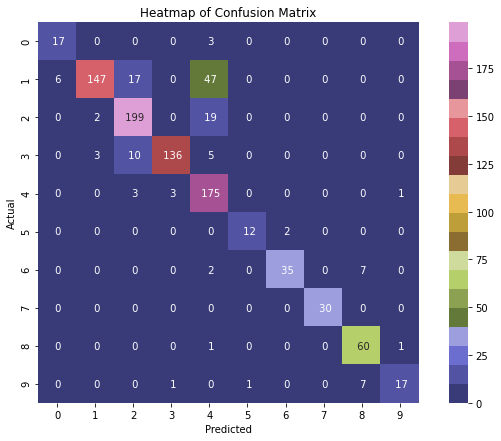

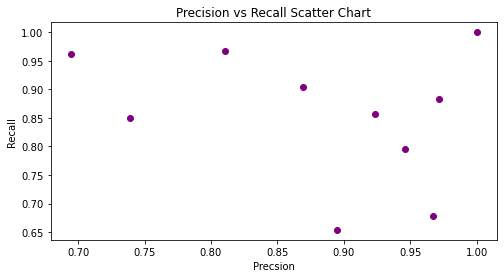



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4072 - accuracy: 0.4799
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8876 - accuracy: 0.6871
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6345 - accuracy: 0.7770
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.4597 - accuracy: 0.8429
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.8421
Score for fold 4: loss of 0.483578324317932

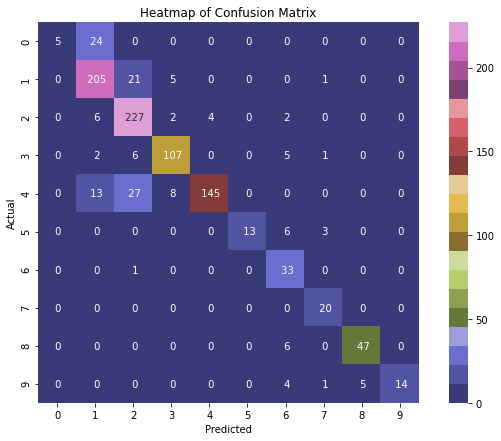

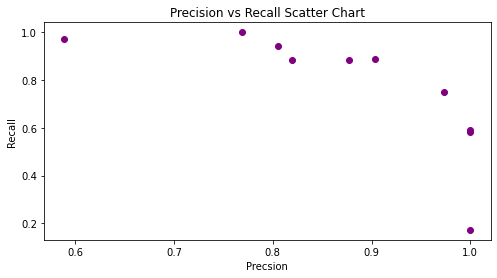



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4403 - accuracy: 0.4620
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9149 - accuracy: 0.6724
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7618 - accuracy: 0.7367
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.4990 - accuracy: 0.8262
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.7688
Score for fold 5: loss of 0.682696104049682

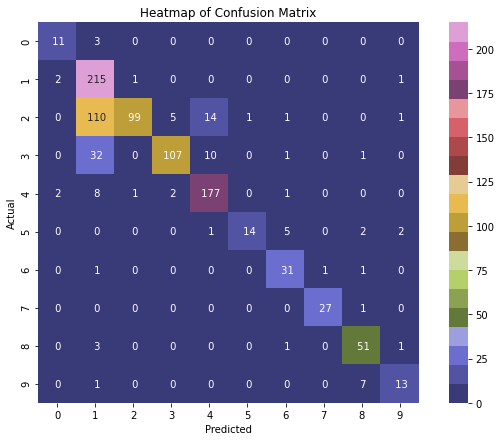

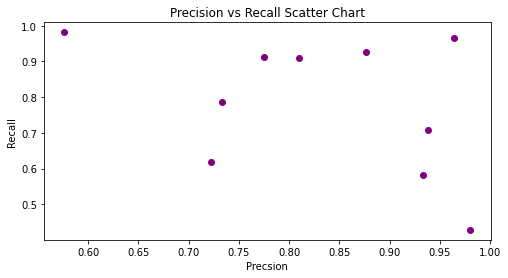



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4461 - accuracy: 0.4636
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8963 - accuracy: 0.6854
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6188 - accuracy: 0.7836
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5388 - accuracy: 0.8163
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.4347 - accuracy: 0.8586
Score for fold 6: loss of 0.434668391942977

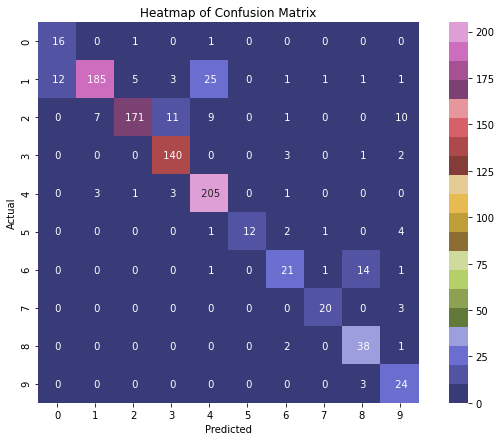

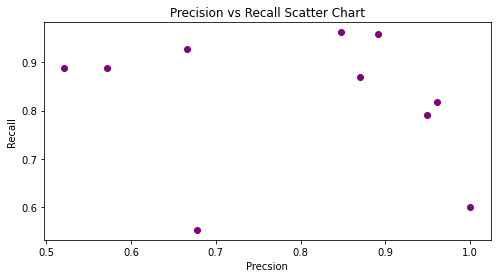



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.3722 - accuracy: 0.4981
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8750 - accuracy: 0.6944
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6926 - accuracy: 0.7608
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5218 - accuracy: 0.8209
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.8958
Score for fold 7: loss of 0.321006149053573

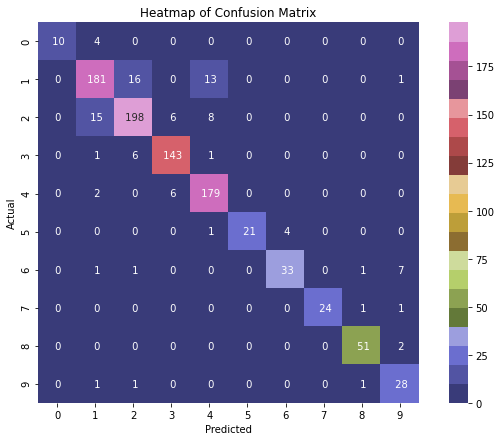

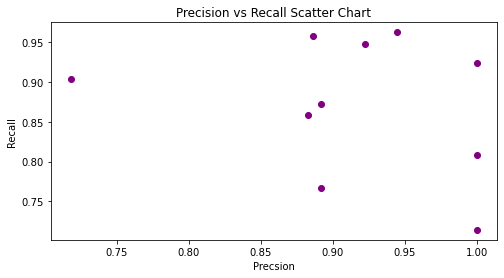



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4537 - accuracy: 0.4614
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9055 - accuracy: 0.6777
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6581 - accuracy: 0.7652
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6139 - accuracy: 0.7868
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.8545
Score for fold 8: loss of 0.411633551120758

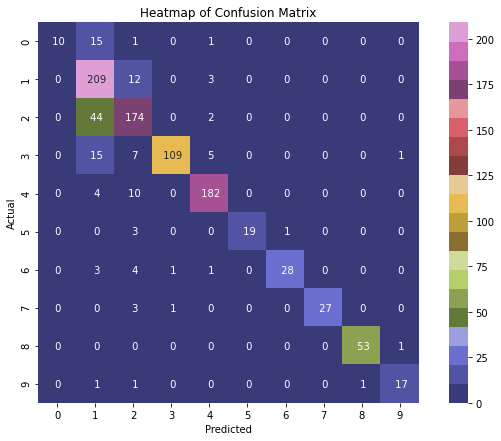

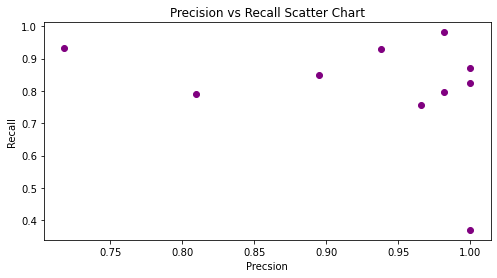



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4517 - accuracy: 0.4564
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9024 - accuracy: 0.6763
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6330 - accuracy: 0.7742
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.4895 - accuracy: 0.8273
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 1.0439 - accuracy: 0.6780
Score for fold 9: loss of 1.043907999992370

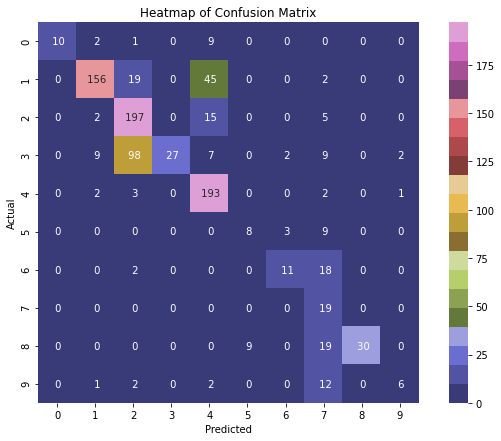

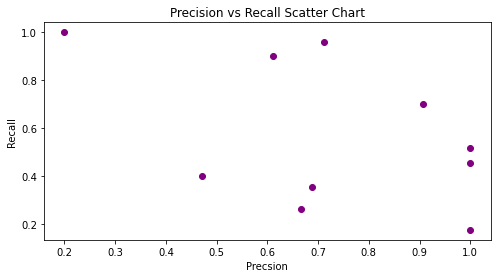



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4677 - accuracy: 0.4639
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9157 - accuracy: 0.6730
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6589 - accuracy: 0.7642
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5384 - accuracy: 0.8175
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3767 - accuracy: 0.8710
Score for fold 10: loss of 0.3766989111900

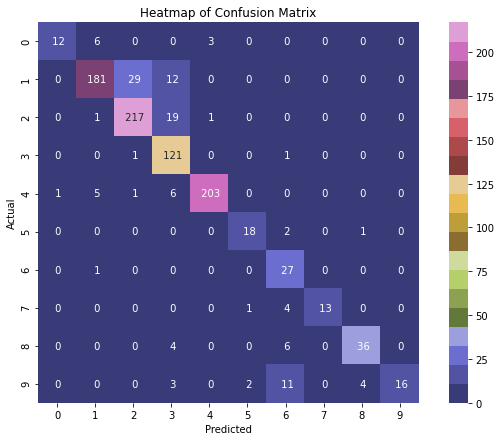

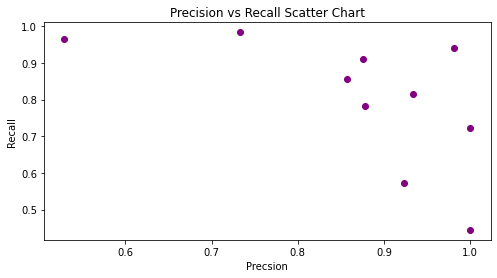



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.4559401273727417 - Accuracy: 85.0361168384552%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.6226184964179993 - Accuracy: 82.04334378242493%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.3808342218399048 - Accuracy: 85.44891476631165%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.48357832431793213 - Accuracy: 84.21052694320679%
---------------------------------------------------------------

In [7]:
neural_network(hidden_layers=2, neurons=100, l_rate=0.01, epochs=5, momentum=0.9)

# 4 Hidden Layers

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5368 - accuracy: 0.4167
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.1070 - accuracy: 0.5882
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7920 - accuracy: 0.7128
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6363 - accuracy: 0.7774
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.8308
Score for fold 1: loss of 0.48434212803840637; accuracy of 83.07533264160156%
Confusion Matrix:
[[ 12   3   0   0   0   0   0   0   0   0]
 [  7 178  17   6   3   0   0   0   5   1]
 [  0   1 208  23   0   0   3   0   3   1]
 [  0   0   0 131   0   0   4   0   5 

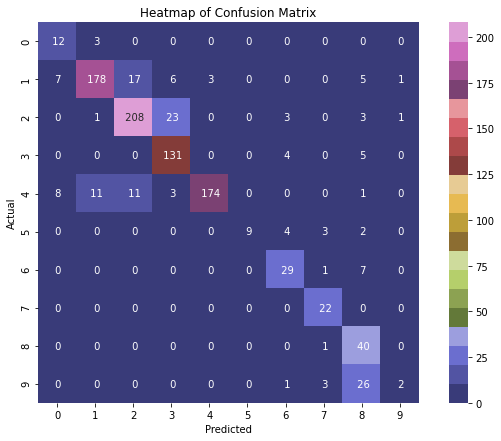

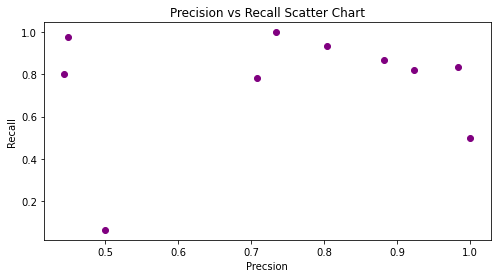



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5824 - accuracy: 0.3973
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.1502 - accuracy: 0.5777
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8587 - accuracy: 0.6926
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6652 - accuracy: 0.7607
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.8328
Score for fold 2: loss of 0.453792005777359

<ipython-input-5-cc40ee183db9>:69: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


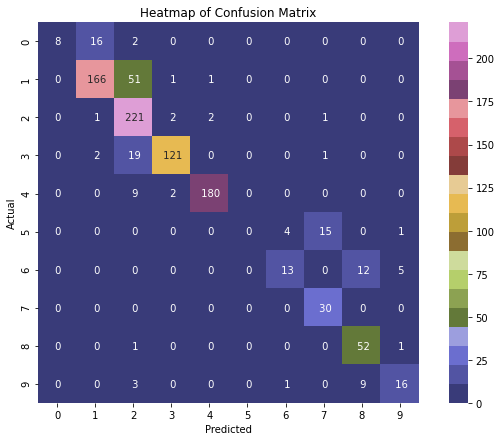

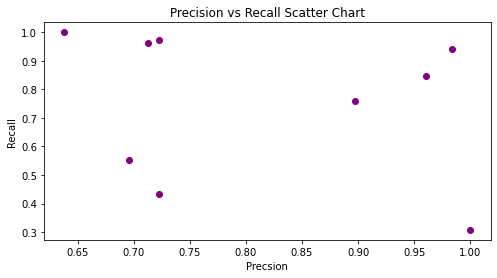



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5660 - accuracy: 0.3941
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.1083 - accuracy: 0.5882
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8288 - accuracy: 0.7053
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5997 - accuracy: 0.7813
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.8070
Score for fold 3: loss of 0.536805450916290

<ipython-input-5-cc40ee183db9>:69: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


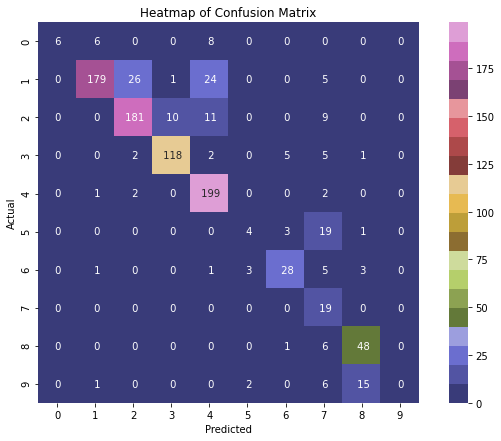

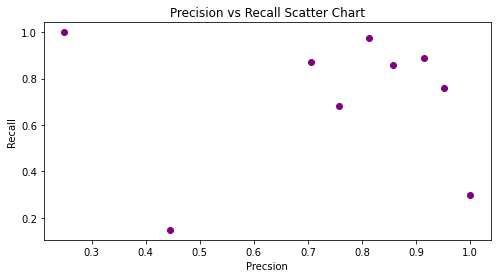



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5634 - accuracy: 0.3955
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.1613 - accuracy: 0.5691
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7770 - accuracy: 0.7193
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6245 - accuracy: 0.7743
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.8173
Score for fold 4: loss of 0.562410950660705

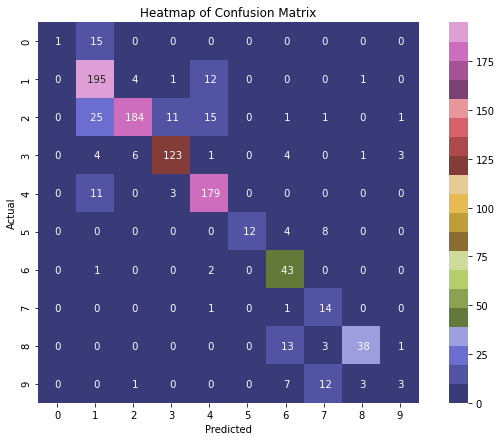

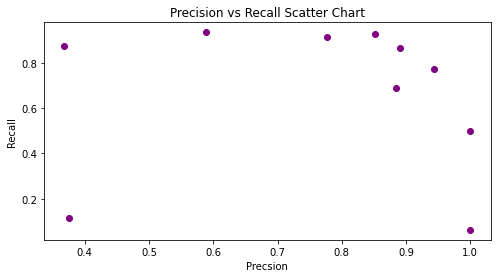



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5618 - accuracy: 0.3972
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.1188 - accuracy: 0.5867
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8245 - accuracy: 0.6996
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6049 - accuracy: 0.7743
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.2980 - accuracy: 0.9102
Score for fold 5: loss of 0.297951221466064

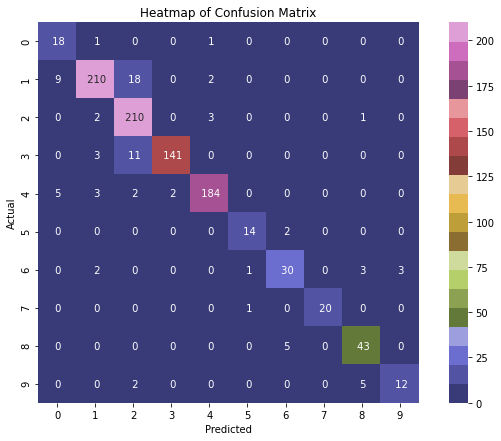

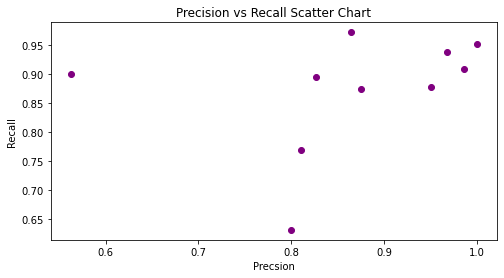



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5992 - accuracy: 0.3727
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.0743 - accuracy: 0.6000
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8473 - accuracy: 0.6943
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6395 - accuracy: 0.7664
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8473
Score for fold 6: loss of 0.414382517337799

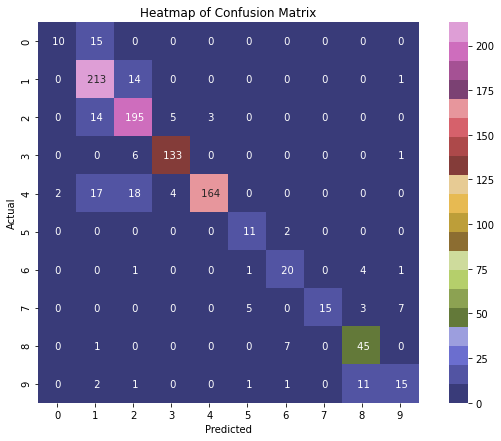

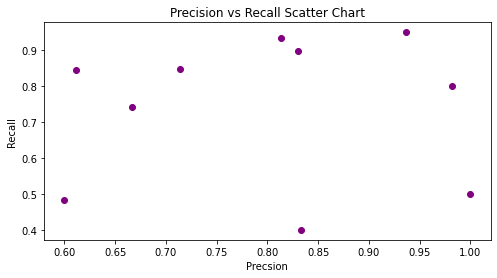



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5322 - accuracy: 0.4172
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.0288 - accuracy: 0.6209
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7462 - accuracy: 0.7255
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6590 - accuracy: 0.7628
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.8246
Score for fold 7: loss of 0.487688273191452

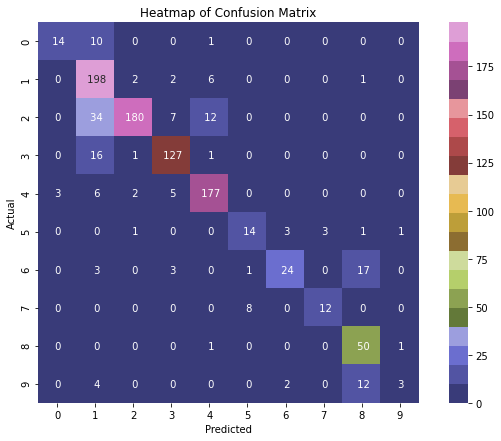

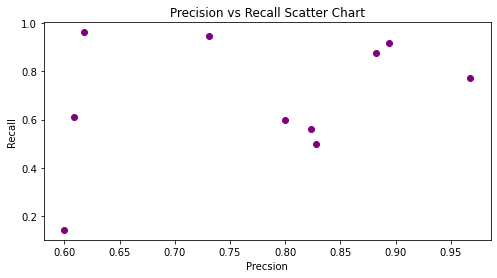



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.6098 - accuracy: 0.3739
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.0748 - accuracy: 0.6010
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8698 - accuracy: 0.6860
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7108 - accuracy: 0.7470
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.8060
Score for fold 8: loss of 0.523609697818756

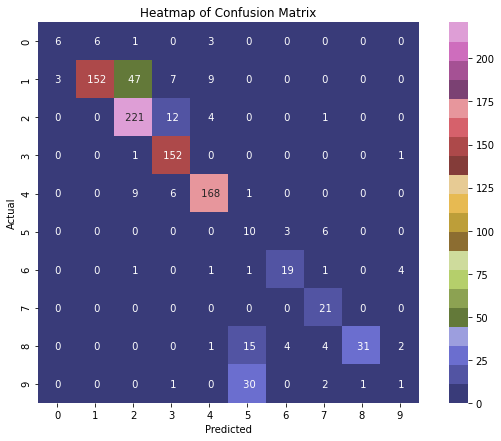

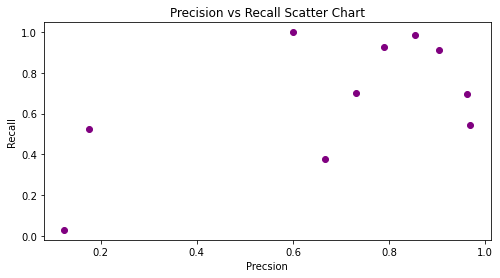



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5926 - accuracy: 0.3752
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.0983 - accuracy: 0.6029
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8062 - accuracy: 0.7027
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6685 - accuracy: 0.7547
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.7585
Score for fold 9: loss of 0.694408357143402

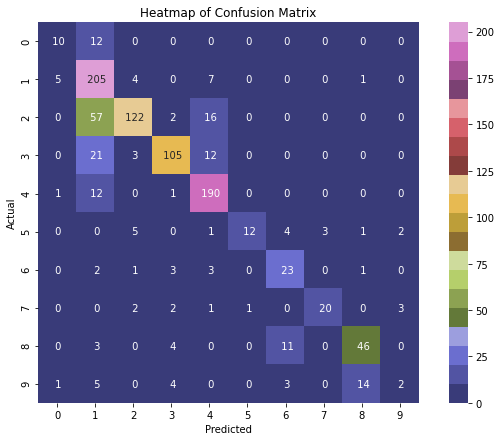

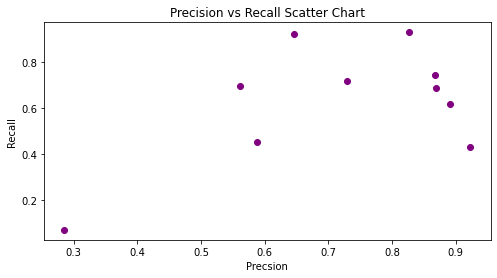



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5979 - accuracy: 0.3891
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.0655 - accuracy: 0.5999
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8515 - accuracy: 0.6828
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6266 - accuracy: 0.7699
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.8596
Score for fold 10: loss of 0.4025759100914

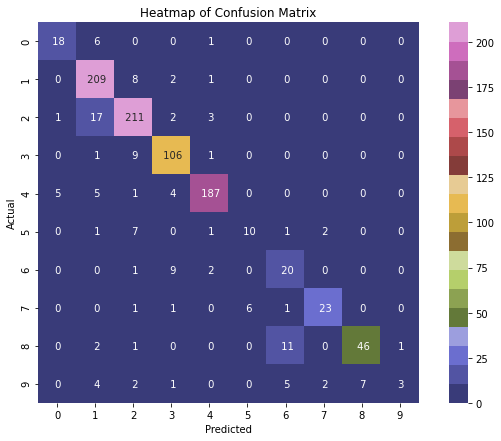

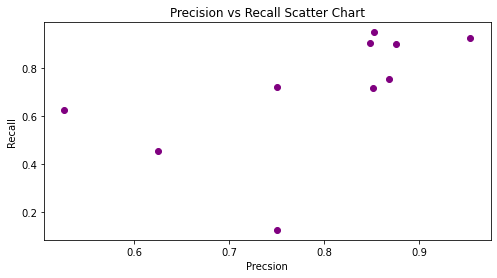



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.48434212803840637 - Accuracy: 83.07533264160156%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.453792005777359 - Accuracy: 83.28173160552979%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.5368054509162903 - Accuracy: 80.70175647735596%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.5624109506607056 - Accuracy: 81.73374533653259%
---------------------------------------------------------------

In [8]:
neural_network(hidden_layers=4, neurons=100, l_rate=0.01, epochs=5, momentum=0.9)

# Neurons in Hidden Layers (Other Parameters remain Constant)

# 50 Neurons

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4940 - accuracy: 0.4489
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.0289 - accuracy: 0.6324
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7638 - accuracy: 0.7337
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6101 - accuracy: 0.7829
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.2746 - accuracy: 0.9092
Score for fold 1: loss of 0.27464044094085693; accuracy of 90.91847538948059%
Confusion Matrix:
[[ 25   1   0   1   0   0   0   0   0   0]
 [  4 195  24   2   1   0   0   0   0   0]
 [  0   2 211   9   4   0   0   0   0   0]
 [  0   0   1 144   1   0   0   0   0 

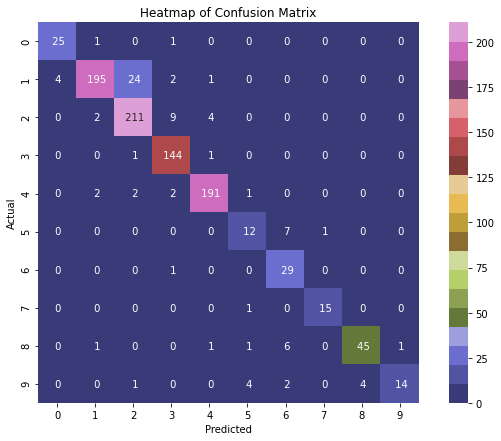

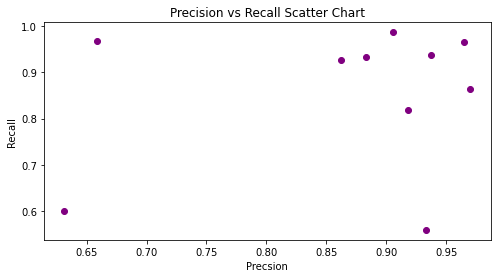



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4707 - accuracy: 0.4503
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9665 - accuracy: 0.6553
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7289 - accuracy: 0.7470
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5507 - accuracy: 0.8079
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.8080
Score for fold 2: loss of 0.630075693130493

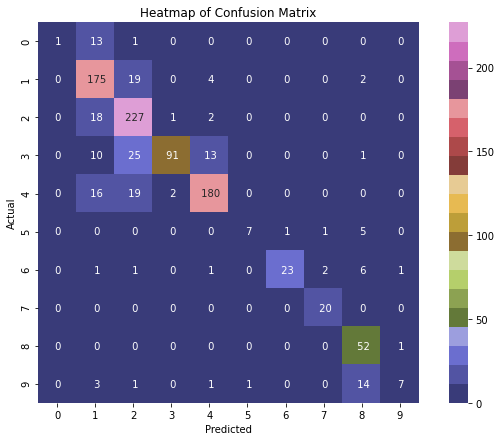

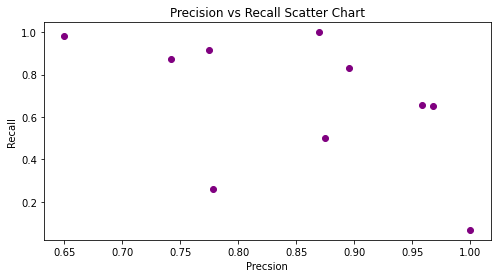



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4578 - accuracy: 0.4535
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.0816 - accuracy: 0.6120
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7645 - accuracy: 0.7253
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6458 - accuracy: 0.7727
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5387 - accuracy: 0.8369
Score for fold 3: loss of 0.538652360439300

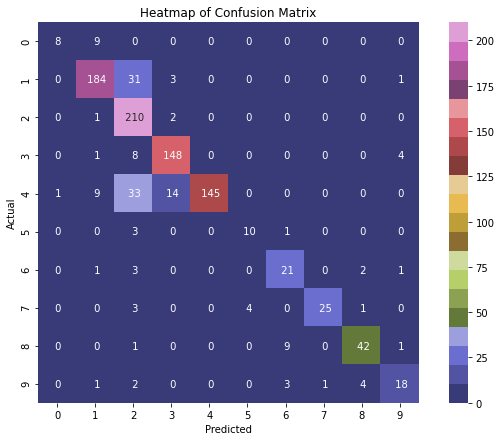

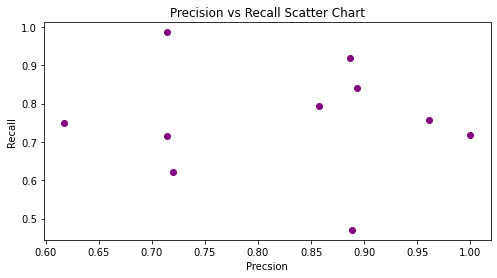



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4773 - accuracy: 0.4513
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9364 - accuracy: 0.6637
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7312 - accuracy: 0.7403
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5320 - accuracy: 0.8183
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8793
Score for fold 4: loss of 0.330224782228469

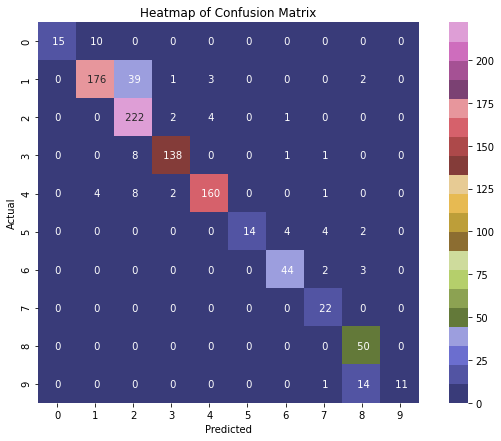

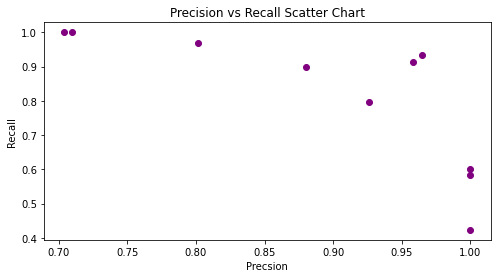



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5189 - accuracy: 0.4360
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.0194 - accuracy: 0.6346
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7664 - accuracy: 0.7262
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6135 - accuracy: 0.7765
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.8824
Score for fold 5: loss of 0.346150517463684

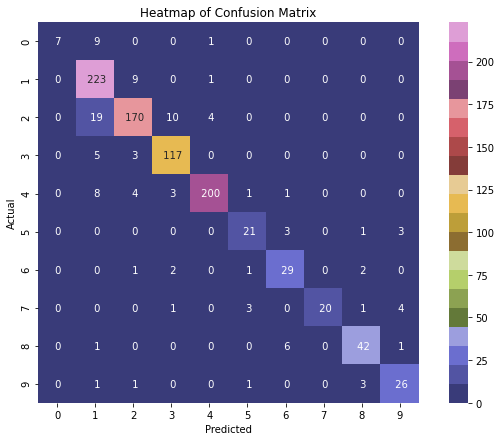

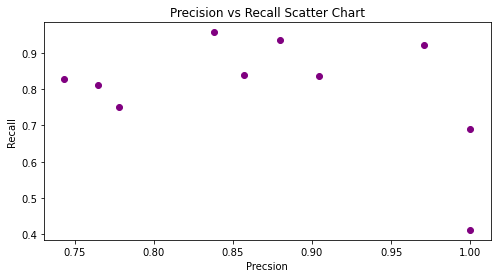



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4910 - accuracy: 0.4447
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9761 - accuracy: 0.6563
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7556 - accuracy: 0.7280
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5893 - accuracy: 0.7961
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4096 - accuracy: 0.8627
Score for fold 6: loss of 0.409618973731994

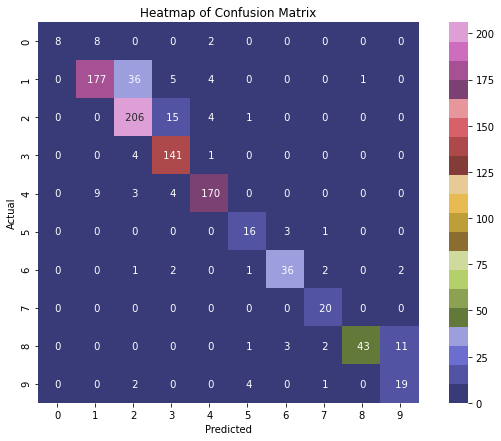

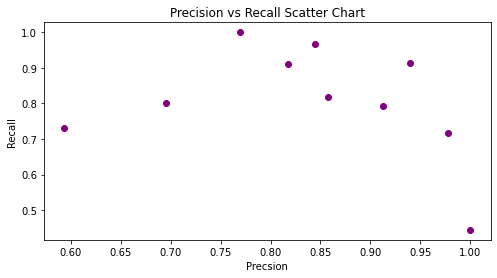



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4893 - accuracy: 0.4491
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.0058 - accuracy: 0.6372
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7592 - accuracy: 0.7307
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5771 - accuracy: 0.8005
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.3979 - accuracy: 0.8607
Score for fold 7: loss of 0.397912234067916

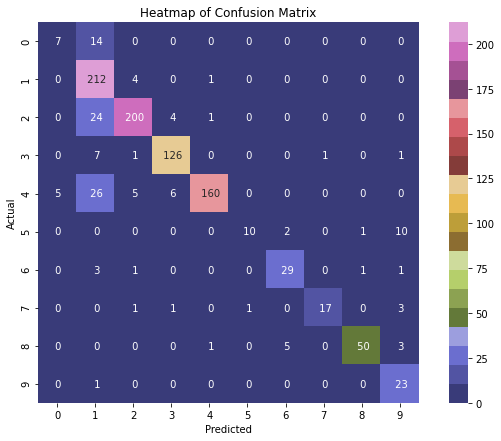

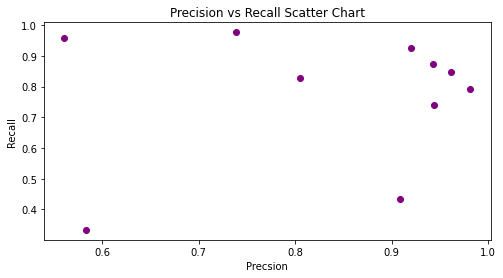



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4339 - accuracy: 0.4712
Epoch 2/5
273/273 [==============================] - 5s 17ms/step - loss: 0.8908 - accuracy: 0.6911
Epoch 3/5
273/273 [==============================] - 5s 17ms/step - loss: 0.7181 - accuracy: 0.7531
Epoch 4/5
273/273 [==============================] - 5s 17ms/step - loss: 0.5325 - accuracy: 0.8152
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.4581 - accuracy: 0.8308
Score for fold 8: loss of 0.458125561475753

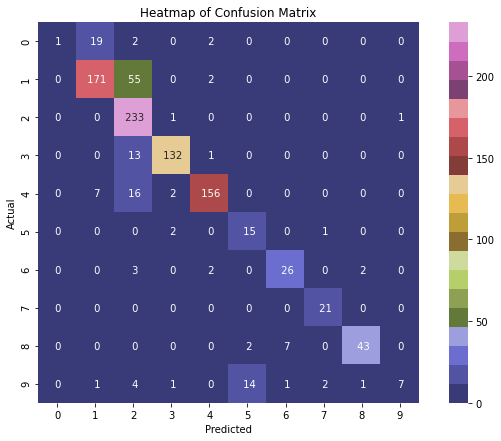

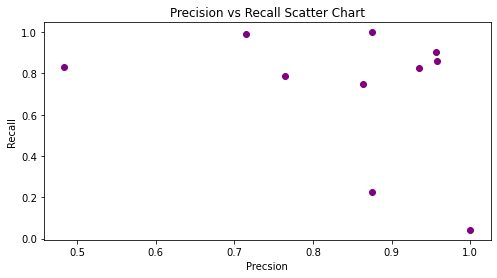



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 5s 17ms/step - loss: 1.5137 - accuracy: 0.4272
Epoch 2/5
273/273 [==============================] - 5s 18ms/step - loss: 0.9850 - accuracy: 0.6459
Epoch 3/5
273/273 [==============================] - 5s 18ms/step - loss: 0.7166 - accuracy: 0.7391
Epoch 4/5
273/273 [==============================] - 5s 17ms/step - loss: 0.5790 - accuracy: 0.7994
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.8359
Score for fold 9: loss of 0.552315711975097

<ipython-input-5-cc40ee183db9>:69: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


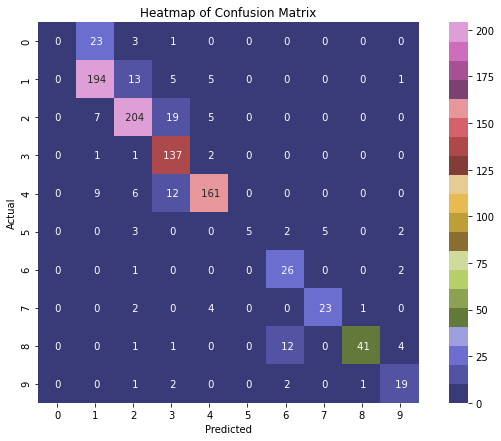

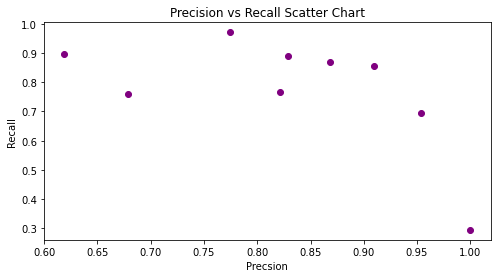



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5341 - accuracy: 0.4198
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9893 - accuracy: 0.6490
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7204 - accuracy: 0.7511
Epoch 4/5
273/273 [==============================] - 5s 17ms/step - loss: 0.6782 - accuracy: 0.7593
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.8122
Score for fold 10: loss of 0.4998336434364

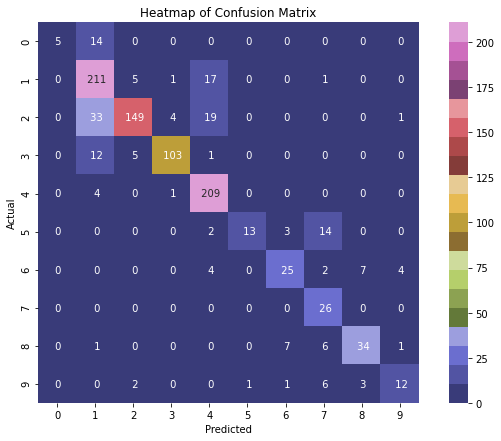

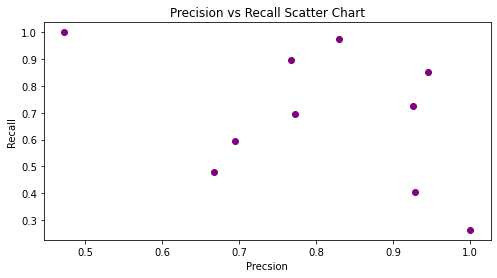



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.27464044094085693 - Accuracy: 90.91847538948059%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.6300756931304932 - Accuracy: 80.80495595932007%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.5386523604393005 - Accuracy: 83.69452953338623%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.33022478222846985 - Accuracy: 87.92569637298584%
-------------------------------------------------------------

In [9]:
neural_network(hidden_layers=2, neurons=50, l_rate=0.01, epochs=5, momentum=0.9)

# 100 Neurons

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5066 - accuracy: 0.4393
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9429 - accuracy: 0.6630
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7232 - accuracy: 0.7438
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5424 - accuracy: 0.8116
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3308 - accuracy: 0.8813
Score for fold 1: loss of 0.3308412432670593; accuracy of 88.13209533691406%
Confusion Matrix:
[[ 16   5   2   0   1   0   0   0   0   0]
 [  3 200  16   1  17   0   0   0   4   0]
 [  0   0 185  10   5   1   1   0   3   1]
 [  0   1   4 120   1   0   1   1   0  

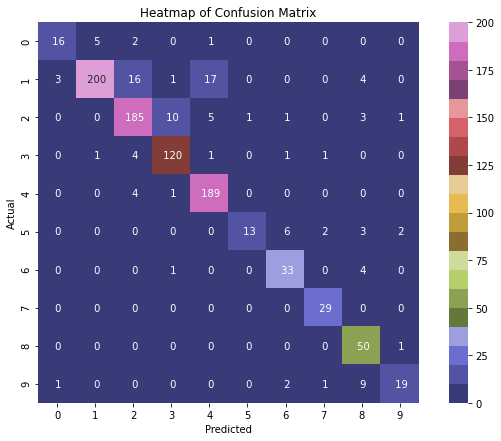

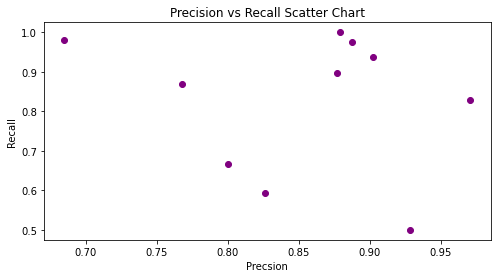



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4606 - accuracy: 0.4580
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9109 - accuracy: 0.6808
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6369 - accuracy: 0.7824
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5285 - accuracy: 0.8144
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8338
Score for fold 2: loss of 0.413698583841323

<ipython-input-5-cc40ee183db9>:69: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


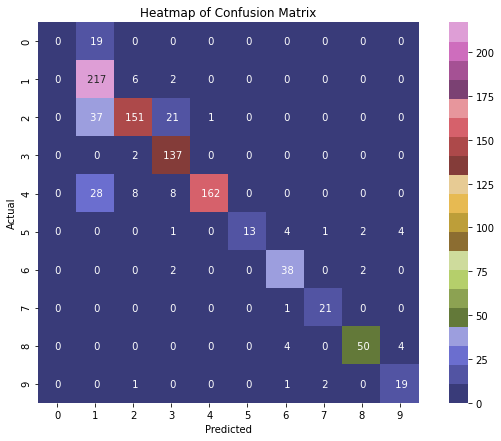

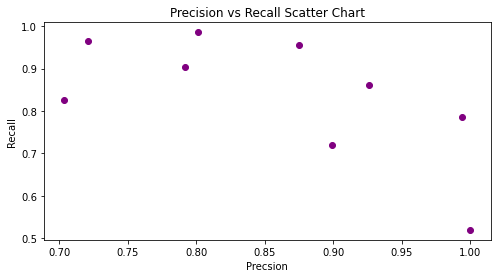



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5078 - accuracy: 0.4381
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9664 - accuracy: 0.6651
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6526 - accuracy: 0.7787
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5511 - accuracy: 0.8117
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.7864
Score for fold 3: loss of 0.600682437419891

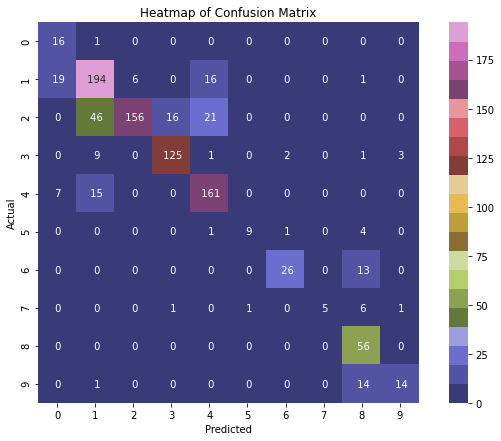

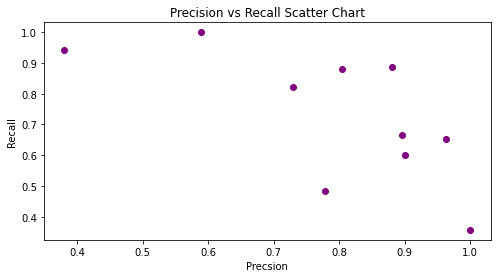



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4631 - accuracy: 0.4465
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9939 - accuracy: 0.6484
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6864 - accuracy: 0.7514
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5470 - accuracy: 0.8148
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.9102
Score for fold 4: loss of 0.305278390645980

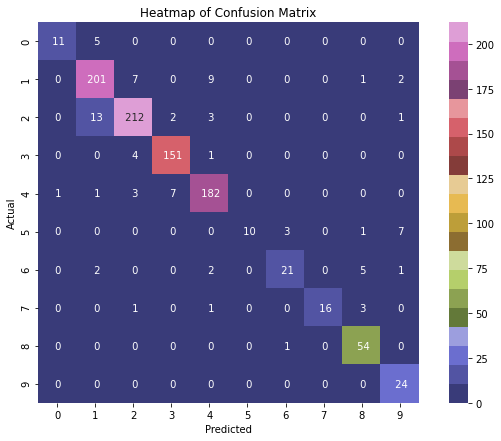

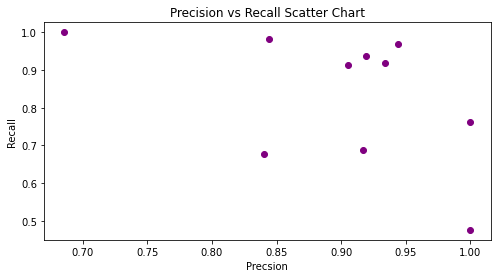



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4571 - accuracy: 0.4454
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9391 - accuracy: 0.6677
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6470 - accuracy: 0.7717
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5003 - accuracy: 0.8223
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8834
Score for fold 5: loss of 0.354580223560333

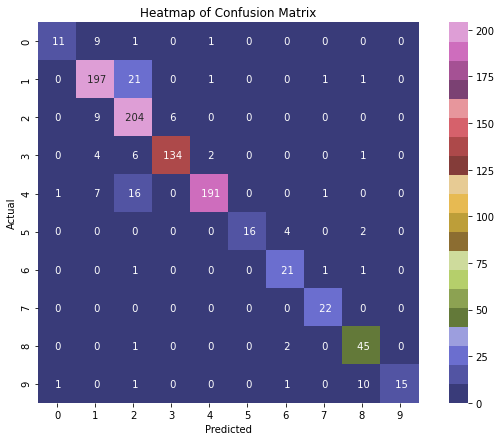

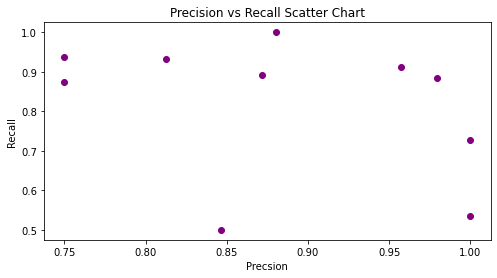



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4513 - accuracy: 0.4690
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9436 - accuracy: 0.6629
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6529 - accuracy: 0.7691
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5015 - accuracy: 0.8218
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.8132
Score for fold 6: loss of 0.534174025058746

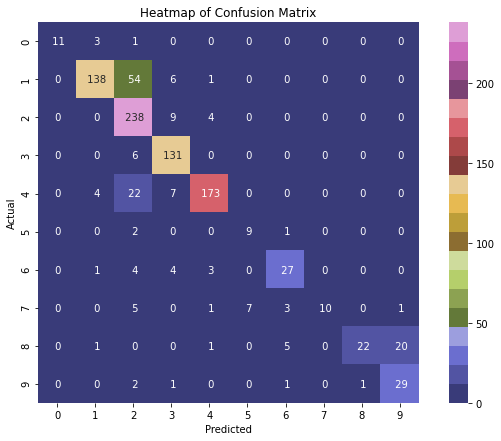

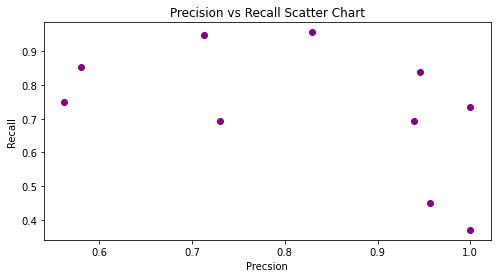



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4373 - accuracy: 0.4699
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9600 - accuracy: 0.6635
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6744 - accuracy: 0.7660
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5073 - accuracy: 0.8232
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8865
Score for fold 7: loss of 0.315214812755584

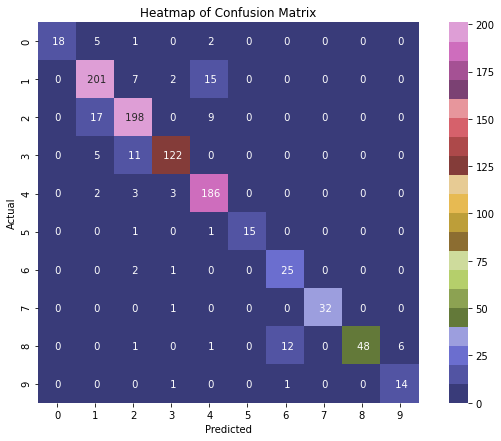

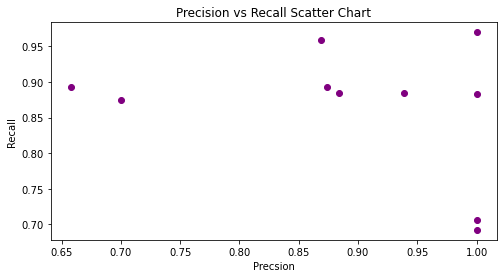



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4806 - accuracy: 0.4456
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9941 - accuracy: 0.6382
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7094 - accuracy: 0.7520
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5303 - accuracy: 0.8144
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.4430 - accuracy: 0.8535
Score for fold 8: loss of 0.443019419908523

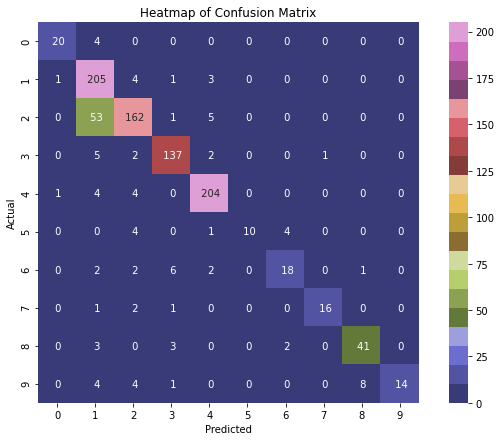

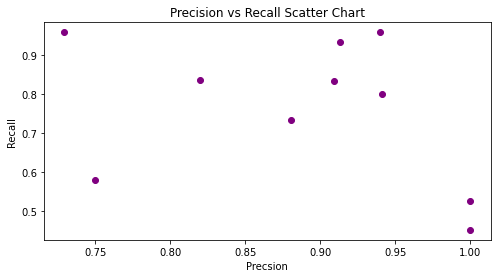



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 5s 17ms/step - loss: 1.4242 - accuracy: 0.4663
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8799 - accuracy: 0.6977
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6282 - accuracy: 0.7828
Epoch 4/5
273/273 [==============================] - 5s 17ms/step - loss: 0.5302 - accuracy: 0.8156
Epoch 5/5
31/31 [==============================] - 0s 5ms/step - loss: 0.6566 - accuracy: 0.7781
Score for fold 9: loss of 0.656639635562896

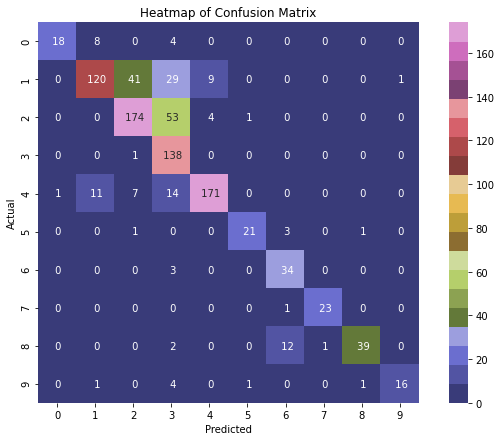

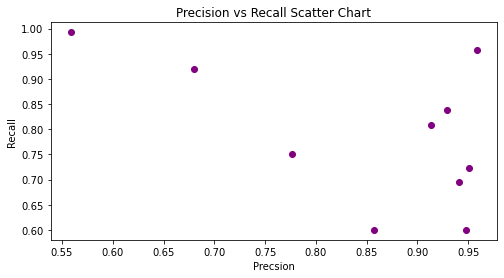



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 5s 17ms/step - loss: 1.4965 - accuracy: 0.4402
Epoch 2/5
273/273 [==============================] - 5s 17ms/step - loss: 0.9628 - accuracy: 0.6513
Epoch 3/5
273/273 [==============================] - 5s 16ms/step - loss: 0.6959 - accuracy: 0.7538
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5693 - accuracy: 0.8012
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.4519 - accuracy: 0.8308
Score for fold 10: loss of 0.4518981277942

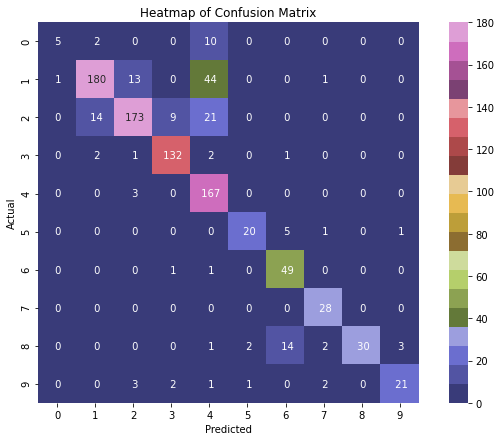

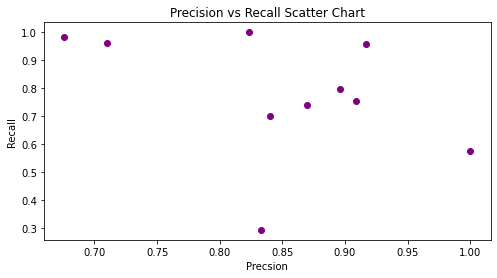



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.3308412432670593 - Accuracy: 88.13209533691406%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.41369858384132385 - Accuracy: 83.3849310874939%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.6006824374198914 - Accuracy: 78.63777279853821%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.30527839064598083 - Accuracy: 91.02166891098022%
--------------------------------------------------------------

In [10]:
neural_network(hidden_layers=2, neurons=100, l_rate=0.01, epochs=5, momentum=0.9)

# 150 Neurons

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 5s 19ms/step - loss: 1.3857 - accuracy: 0.4905
Epoch 2/5
273/273 [==============================] - 6s 21ms/step - loss: 0.9141 - accuracy: 0.6769
Epoch 3/5
273/273 [==============================] - 5s 20ms/step - loss: 0.6676 - accuracy: 0.7536
Epoch 4/5
273/273 [==============================] - 6s 21ms/step - loss: 0.4820 - accuracy: 0.8279
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8524
Score for fold 1: loss of 0.38143691420555115; accuracy of 85.24251580238342%
Confusion Matrix:
[[ 16   8   0   0   0   0   0   0   0   0]
 [  0 216  21   0   0   0   0   0   0   0]
 [  0  10 188   7   0   0   0   0   0   0]
 [  0   4   1 136   1   0   0   0   0 

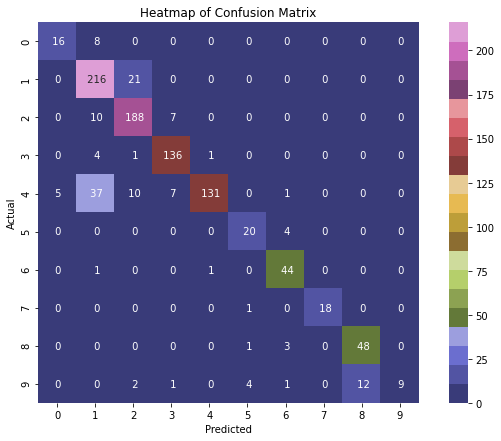

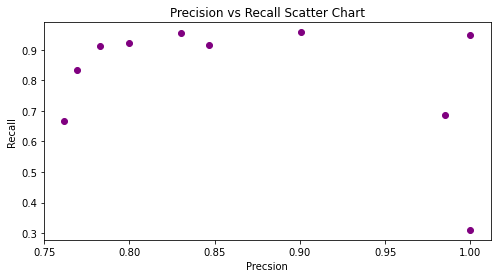



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 5s 18ms/step - loss: 1.4355 - accuracy: 0.4713
Epoch 2/5
273/273 [==============================] - 5s 19ms/step - loss: 0.8975 - accuracy: 0.6786
Epoch 3/5
273/273 [==============================] - 5s 19ms/step - loss: 0.6562 - accuracy: 0.7670
Epoch 4/5
273/273 [==============================] - 5s 19ms/step - loss: 0.5304 - accuracy: 0.8168
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.4016 - accuracy: 0.8514
Score for fold 2: loss of 0.401628911495208

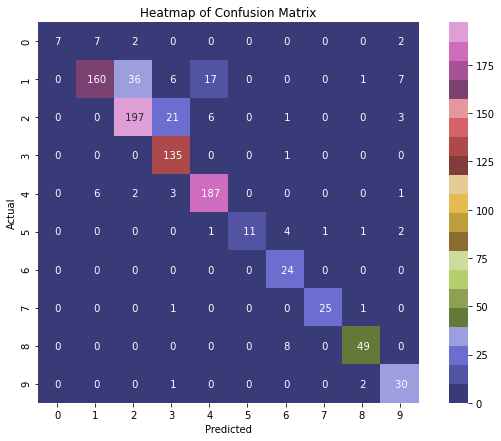

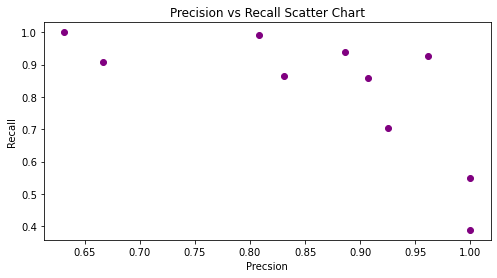



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 6s 20ms/step - loss: 1.4049 - accuracy: 0.4885
Epoch 2/5
273/273 [==============================] - 6s 21ms/step - loss: 0.8801 - accuracy: 0.6864
Epoch 3/5
273/273 [==============================] - 6s 21ms/step - loss: 0.6674 - accuracy: 0.7632
Epoch 4/5
273/273 [==============================] - 5s 18ms/step - loss: 0.4830 - accuracy: 0.8271
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.3724 - accuracy: 0.8710
Score for fold 3: loss of 0.372411519289016

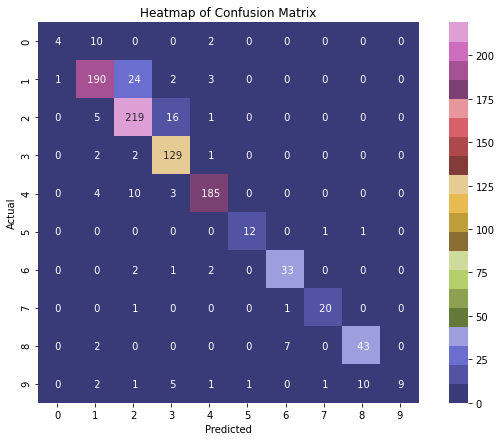

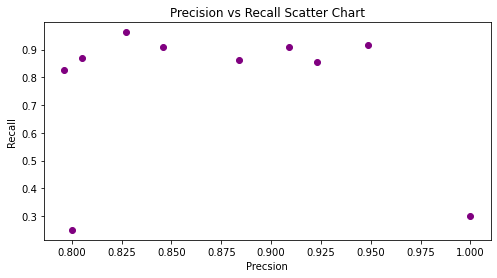



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 6s 20ms/step - loss: 1.4115 - accuracy: 0.4833
Epoch 2/5
273/273 [==============================] - 6s 21ms/step - loss: 0.8642 - accuracy: 0.6945
Epoch 3/5
273/273 [==============================] - 6s 22ms/step - loss: 0.6243 - accuracy: 0.7833
Epoch 4/5
273/273 [==============================] - 6s 21ms/step - loss: 0.4536 - accuracy: 0.8463
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.5045 - accuracy: 0.7988
Score for fold 4: loss of 0.504461050033569

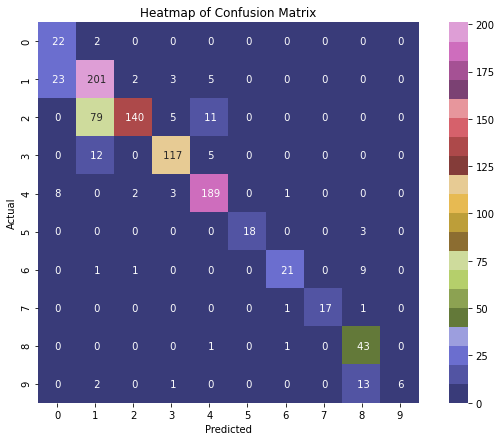

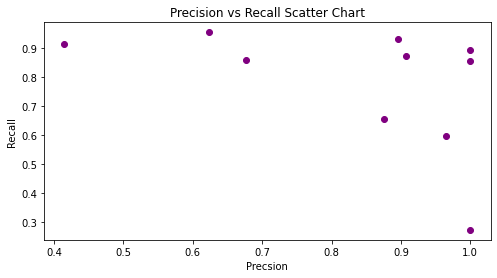



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 6s 22ms/step - loss: 1.4824 - accuracy: 0.4353
Epoch 2/5
273/273 [==============================] - 6s 21ms/step - loss: 0.9531 - accuracy: 0.6586
Epoch 3/5
273/273 [==============================] - 6s 21ms/step - loss: 0.7434 - accuracy: 0.7358
Epoch 4/5
273/273 [==============================] - 5s 19ms/step - loss: 0.5667 - accuracy: 0.8017
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.3544 - accuracy: 0.8834
Score for fold 5: loss of 0.354419738054275

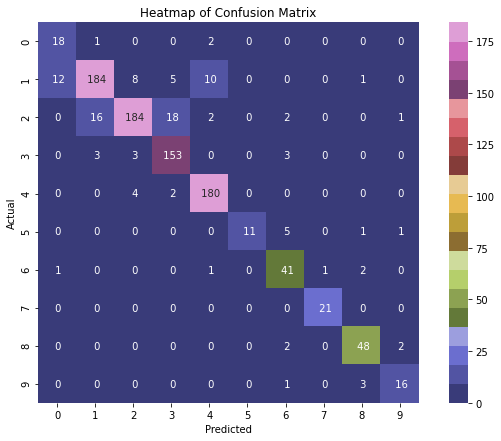

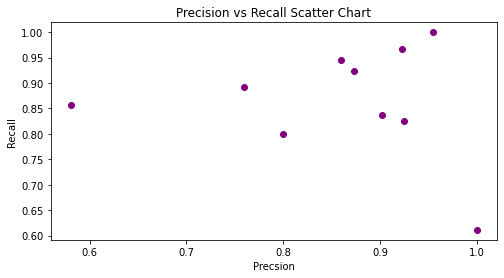



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 5s 20ms/step - loss: 1.4993 - accuracy: 0.4333
Epoch 2/5
273/273 [==============================] - 5s 20ms/step - loss: 0.9790 - accuracy: 0.6447
Epoch 3/5
273/273 [==============================] - 5s 20ms/step - loss: 0.7308 - accuracy: 0.7448
Epoch 4/5
273/273 [==============================] - 6s 20ms/step - loss: 0.4888 - accuracy: 0.8329
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.2712 - accuracy: 0.8968
Score for fold 6: loss of 0.271211147308349

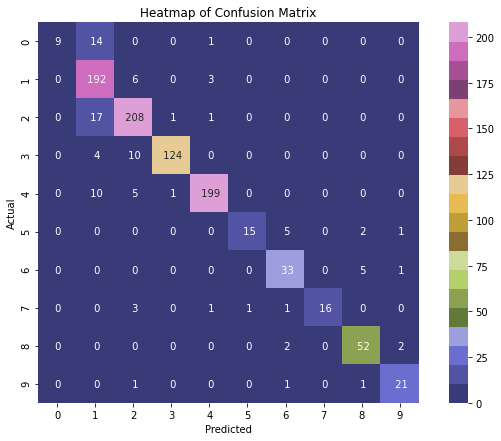

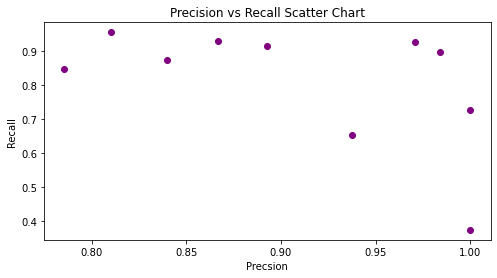



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 6s 21ms/step - loss: 1.4395 - accuracy: 0.4647
Epoch 2/5
273/273 [==============================] - 6s 20ms/step - loss: 0.9068 - accuracy: 0.6768
Epoch 3/5
273/273 [==============================] - 6s 20ms/step - loss: 0.6704 - accuracy: 0.7646
Epoch 4/5
273/273 [==============================] - 5s 20ms/step - loss: 0.5097 - accuracy: 0.8193
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3361 - accuracy: 0.8896
Score for fold 7: loss of 0.336097896099090

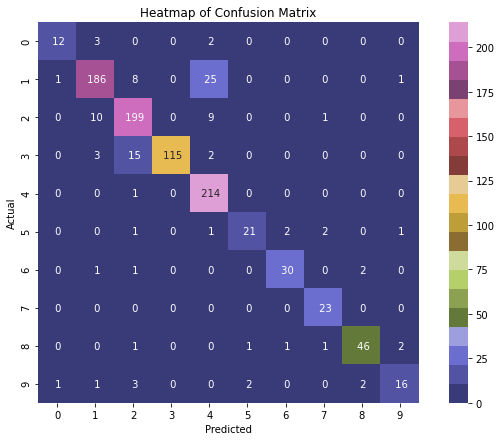

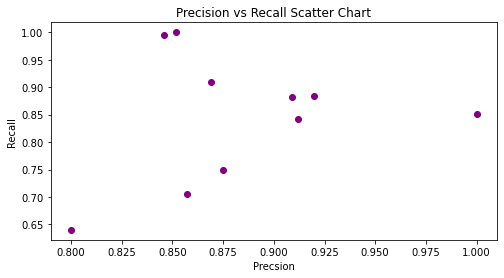



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 6s 21ms/step - loss: 1.4591 - accuracy: 0.4591
Epoch 2/5
273/273 [==============================] - 5s 18ms/step - loss: 0.8652 - accuracy: 0.6933
Epoch 3/5
273/273 [==============================] - 5s 18ms/step - loss: 0.6683 - accuracy: 0.7600
Epoch 4/5
273/273 [==============================] - 6s 21ms/step - loss: 0.4811 - accuracy: 0.8325
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5198 - accuracy: 0.8122
Score for fold 8: loss of 0.519773066043853

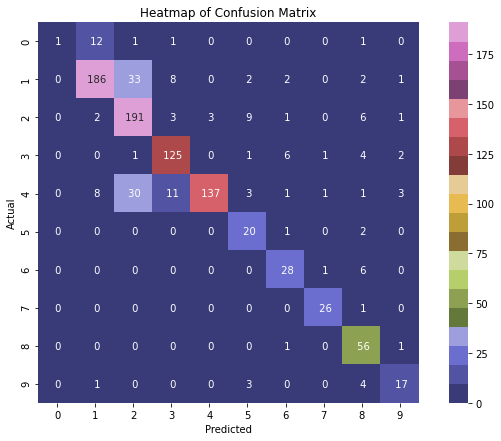

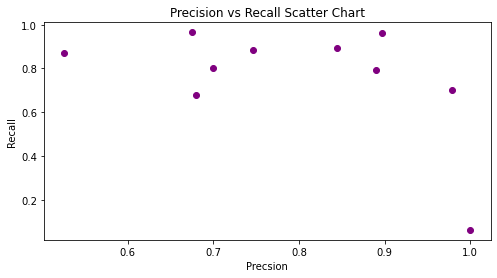



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 6s 21ms/step - loss: 1.4528 - accuracy: 0.4544
Epoch 2/5
273/273 [==============================] - 6s 21ms/step - loss: 0.8851 - accuracy: 0.6792
Epoch 3/5
273/273 [==============================] - 6s 21ms/step - loss: 0.6383 - accuracy: 0.7742
Epoch 4/5
273/273 [==============================] - 6s 22ms/step - loss: 0.5282 - accuracy: 0.8133
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.7874
Score for fold 9: loss of 0.655362367630004

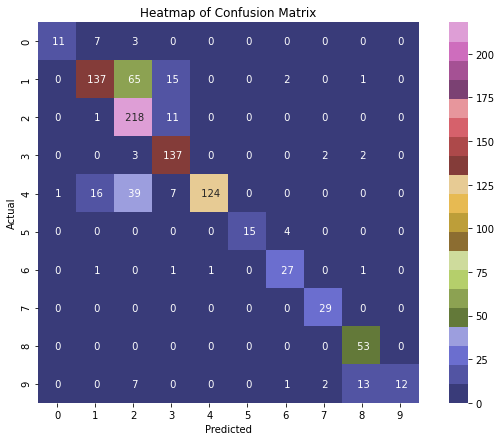

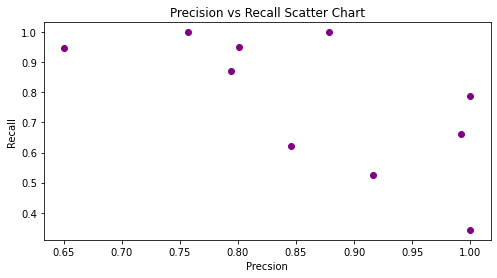



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 5s 19ms/step - loss: 1.4694 - accuracy: 0.4549
Epoch 2/5
273/273 [==============================] - 5s 20ms/step - loss: 0.9089 - accuracy: 0.6760
Epoch 3/5
273/273 [==============================] - 5s 19ms/step - loss: 0.6991 - accuracy: 0.7508
Epoch 4/5
273/273 [==============================] - 6s 21ms/step - loss: 0.5090 - accuracy: 0.8224
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.5867 - accuracy: 0.7833
Score for fold 10: loss of 0.5866678953170

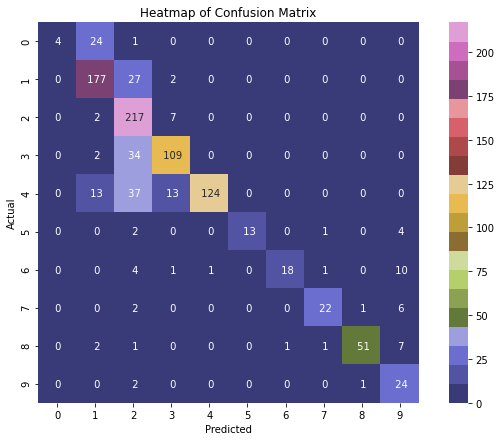

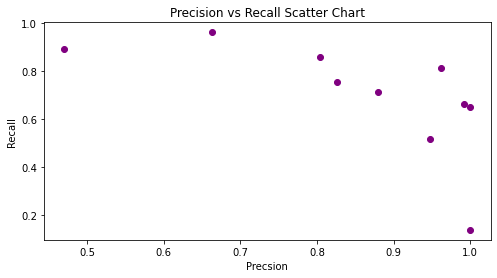



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.38143691420555115 - Accuracy: 85.24251580238342%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.40162891149520874 - Accuracy: 85.13931632041931%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.3724115192890167 - Accuracy: 87.10010051727295%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.5044610500335693 - Accuracy: 79.87616062164307%
-------------------------------------------------------------

In [11]:
neural_network(hidden_layers=2, neurons=150, l_rate=0.01, epochs=5, momentum=0.9)       

# Learning Rate (Other Parameters remian Constant)

# Learning Rate = 0.005

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 5s 17ms/step - loss: 1.5235 - accuracy: 0.4443
Epoch 2/5
273/273 [==============================] - 5s 17ms/step - loss: 0.9563 - accuracy: 0.6620
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6395 - accuracy: 0.7836
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5368 - accuracy: 0.8222
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.8586
Score for fold 1: loss of 0.43887558579444885; accuracy of 85.86171269416809%
Confusion Matrix:
[[  6   4   2   0   3   0   0   0   0   0]
 [  0 172  42   5   6   0   0   0   0   4]
 [  0   3 193   3   3   0   0   0   0   0]
 [  0   0   7 138   1   0   0   0   0 

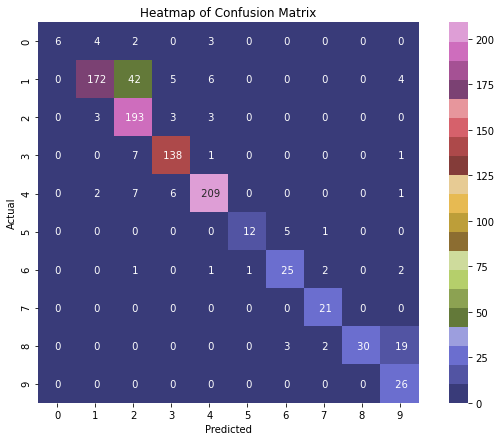

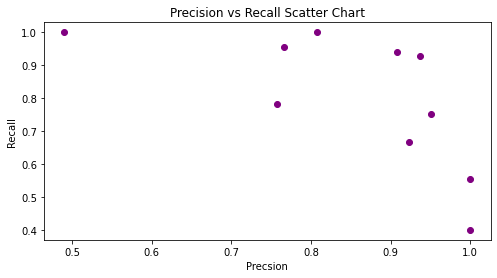



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 5s 17ms/step - loss: 1.4723 - accuracy: 0.4431
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8775 - accuracy: 0.7015
Epoch 3/5
273/273 [==============================] - 5s 17ms/step - loss: 0.6656 - accuracy: 0.7716
Epoch 4/5
273/273 [==============================] - 5s 17ms/step - loss: 0.5076 - accuracy: 0.8298
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.7771
Score for fold 2: loss of 0.634735703468322

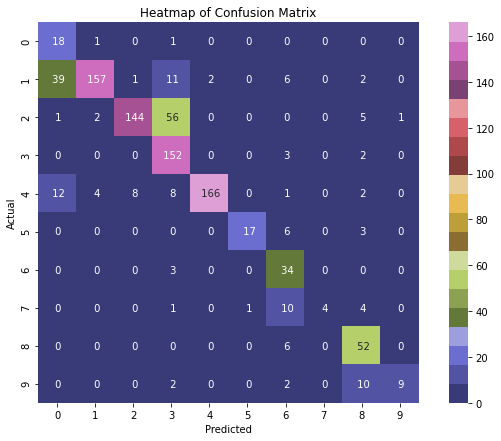

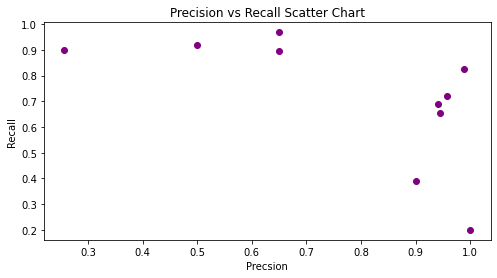



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 5s 17ms/step - loss: 1.5093 - accuracy: 0.4418
Epoch 2/5
273/273 [==============================] - 5s 17ms/step - loss: 0.9221 - accuracy: 0.6757
Epoch 3/5
273/273 [==============================] - 5s 17ms/step - loss: 0.6813 - accuracy: 0.7755
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5032 - accuracy: 0.8334
Epoch 5/5
31/31 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.8504
Score for fold 3: loss of 0.465069532394409

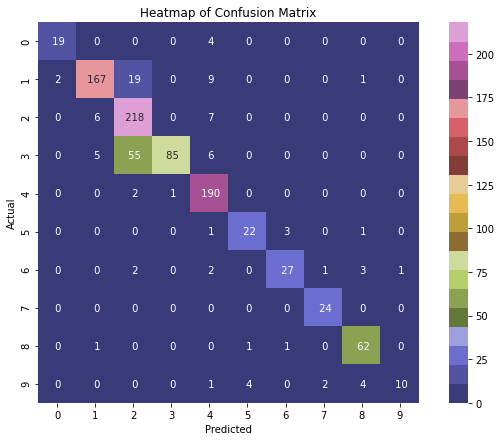

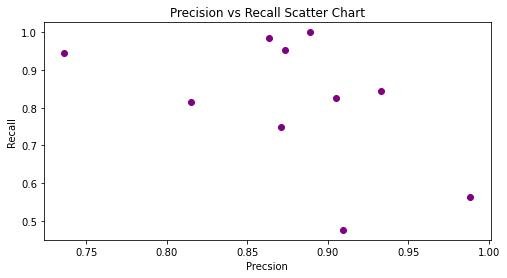



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 5s 17ms/step - loss: 1.5222 - accuracy: 0.4478
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9768 - accuracy: 0.6690
Epoch 3/5
273/273 [==============================] - 5s 17ms/step - loss: 0.6381 - accuracy: 0.7962
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.4841 - accuracy: 0.8434
Epoch 5/5
31/31 [==============================] - 0s 4ms/step - loss: 0.3959 - accuracy: 0.8689
Score for fold 4: loss of 0.395921915769577

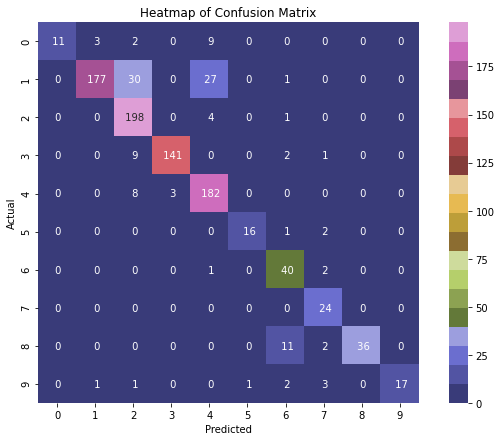

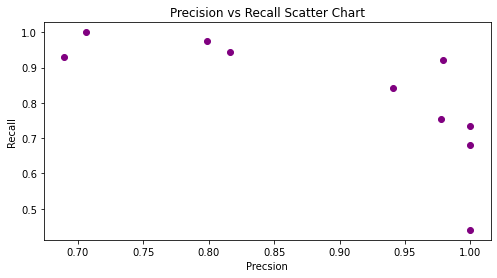



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 5s 17ms/step - loss: 1.4973 - accuracy: 0.4591
Epoch 2/5
273/273 [==============================] - 5s 18ms/step - loss: 0.8844 - accuracy: 0.6965
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6320 - accuracy: 0.7887
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5062 - accuracy: 0.8309
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8493
Score for fold 5: loss of 0.447089582681655

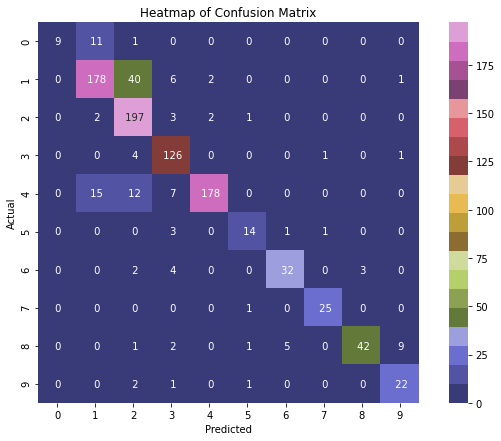

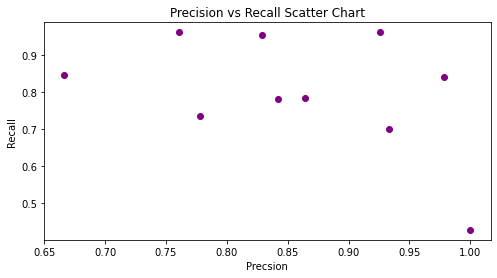



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5115 - accuracy: 0.4564
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8828 - accuracy: 0.6960
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7542 - accuracy: 0.7417
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5558 - accuracy: 0.8101
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.8431
Score for fold 6: loss of 0.455687224864959

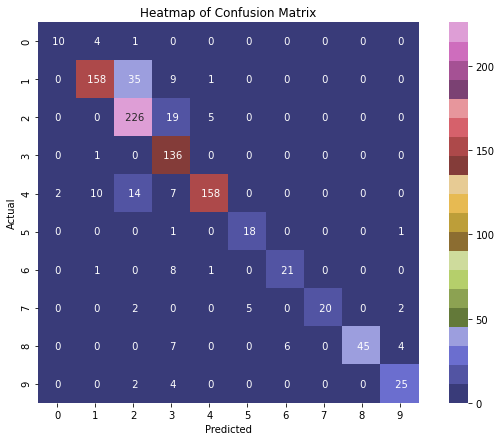

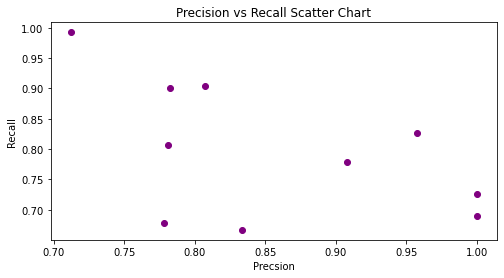



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5316 - accuracy: 0.4280
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9609 - accuracy: 0.6629
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6504 - accuracy: 0.7841
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.4956 - accuracy: 0.8366
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8762
Score for fold 7: loss of 0.358909279108047

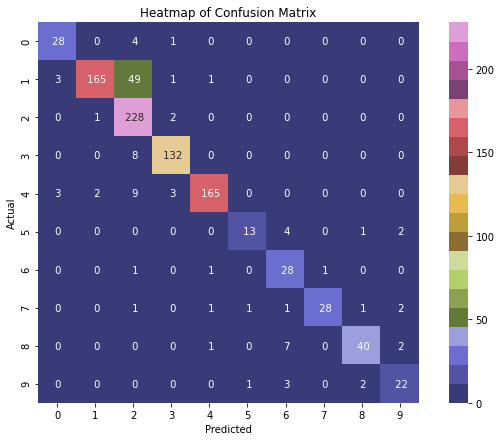

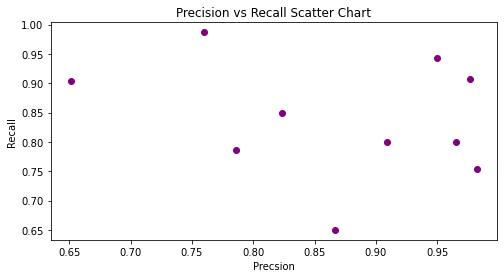



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4705 - accuracy: 0.4701
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8714 - accuracy: 0.7074
Epoch 3/5
273/273 [==============================] - 5s 17ms/step - loss: 0.6092 - accuracy: 0.8000
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.4730 - accuracy: 0.8488
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3737 - accuracy: 0.8596
Score for fold 8: loss of 0.373718768358230

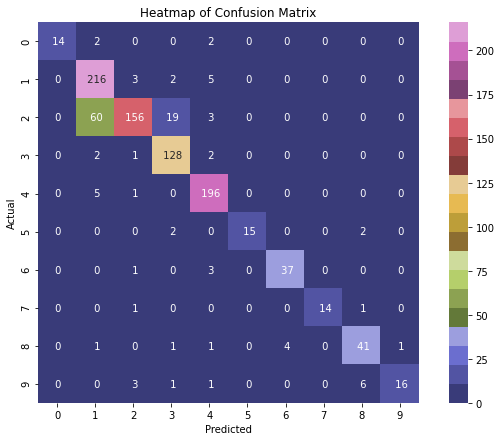

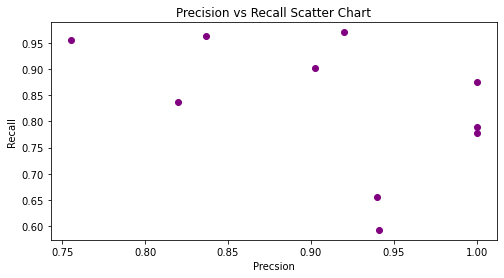



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5058 - accuracy: 0.4427
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9433 - accuracy: 0.6741
Epoch 3/5
273/273 [==============================] - 5s 17ms/step - loss: 0.6463 - accuracy: 0.7900
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5354 - accuracy: 0.8227
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3010 - accuracy: 0.9092
Score for fold 9: loss of 0.301017075777053

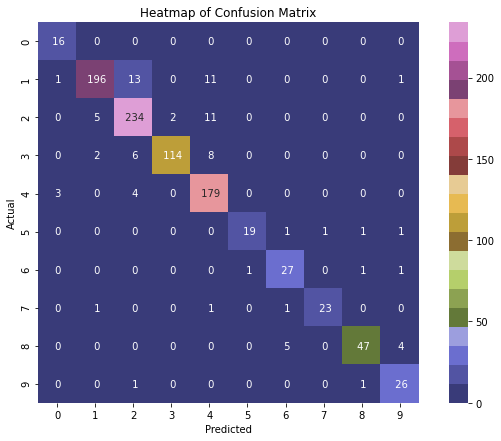

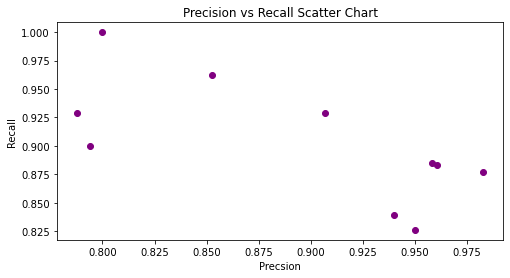



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4695 - accuracy: 0.4522
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9442 - accuracy: 0.6707
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6316 - accuracy: 0.7927
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5685 - accuracy: 0.8105
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.2970 - accuracy: 0.9061
Score for fold 10: loss of 0.2970088422298

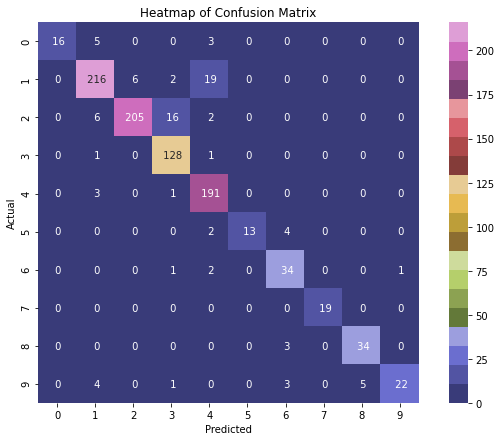

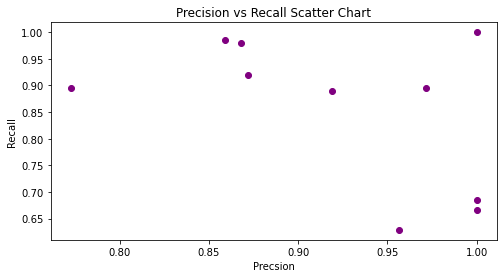



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.43887558579444885 - Accuracy: 85.86171269416809%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.6347357034683228 - Accuracy: 77.7089774608612%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.4650695323944092 - Accuracy: 85.0361168384552%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.395921915769577 - Accuracy: 86.8937075138092%
------------------------------------------------------------------

In [12]:
neural_network(hidden_layers=2, neurons=100, l_rate=0.005, epochs=5, momentum=0.9)

# Learning Rate = 0.01

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4603 - accuracy: 0.4493
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8918 - accuracy: 0.6713
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6233 - accuracy: 0.7774
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5340 - accuracy: 0.8154
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.8937
Score for fold 1: loss of 0.30561184883117676; accuracy of 89.37048316001892%
Confusion Matrix:
[[  8   9   0   0   1   0   0   0   0   0]
 [  0 196  18   2   4   0   0   0   0   0]
 [  0   8 213   4   5   0   0   0   0   0]
 [  0   3  11 116   1   0   0   0   0 

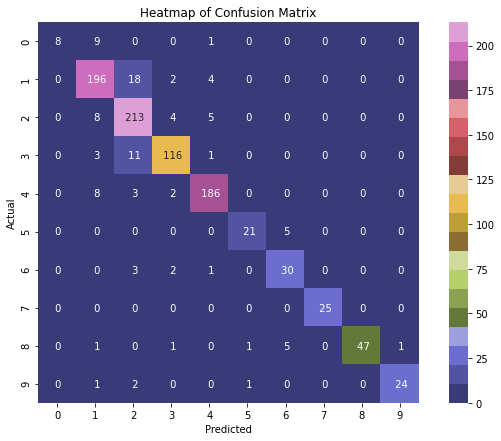

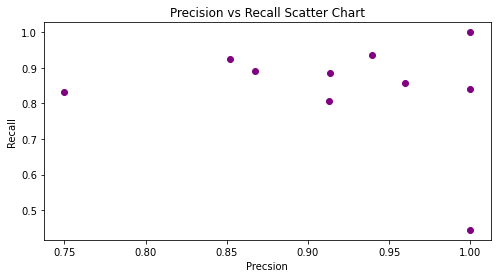



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4457 - accuracy: 0.4608
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9611 - accuracy: 0.6624
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7252 - accuracy: 0.7440
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5298 - accuracy: 0.8095
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.8514
Score for fold 2: loss of 0.424007892608642

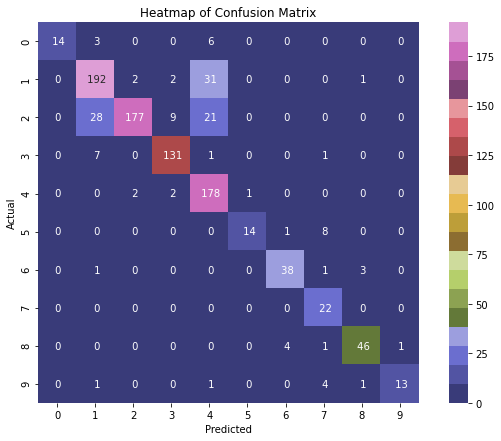

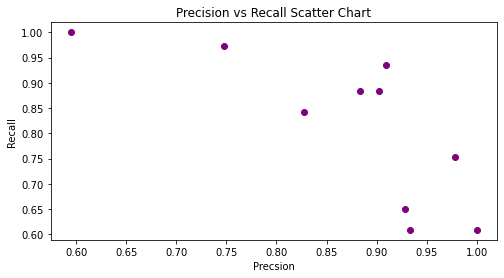



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5267 - accuracy: 0.4331
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9403 - accuracy: 0.6628
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7290 - accuracy: 0.7378
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5885 - accuracy: 0.7969
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.8111
Score for fold 3: loss of 0.566663801670074

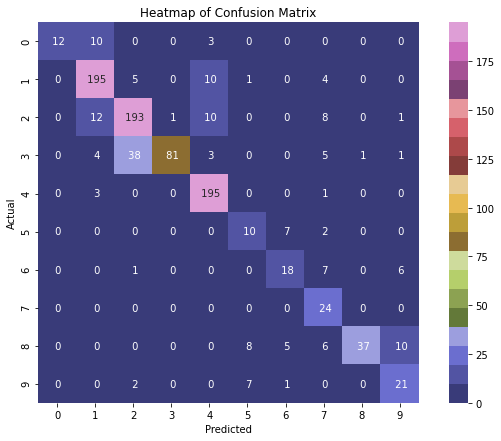

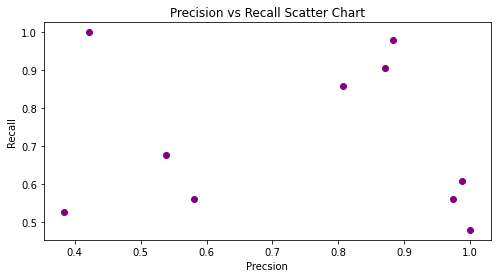



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4700 - accuracy: 0.4568
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9200 - accuracy: 0.6657
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6688 - accuracy: 0.7641
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5361 - accuracy: 0.8129
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.8235
Score for fold 4: loss of 0.504046976566314

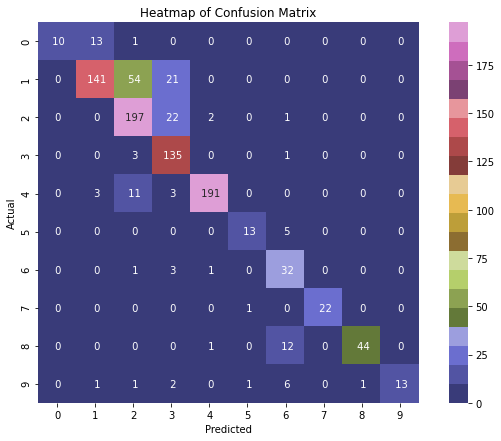

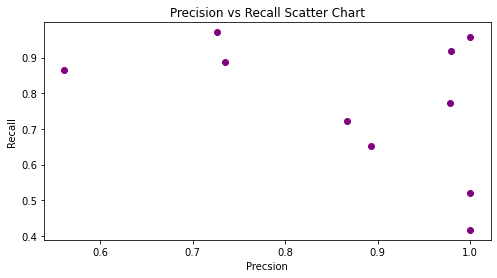



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5258 - accuracy: 0.4119
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9893 - accuracy: 0.6393
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7478 - accuracy: 0.7280
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6545 - accuracy: 0.7692
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.8235
Score for fold 5: loss of 0.515089690685272

<ipython-input-5-cc40ee183db9>:69: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


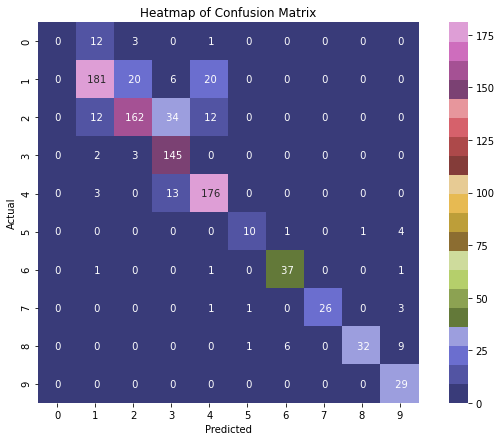

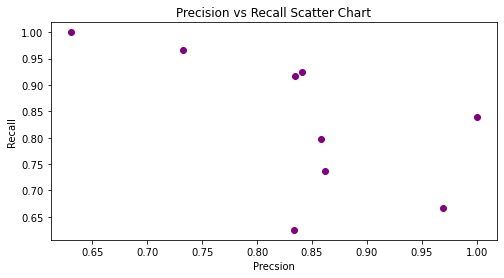



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5087 - accuracy: 0.4288
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9656 - accuracy: 0.6588
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7689 - accuracy: 0.7278
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5034 - accuracy: 0.8220
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3744 - accuracy: 0.8824
Score for fold 6: loss of 0.374438047409057

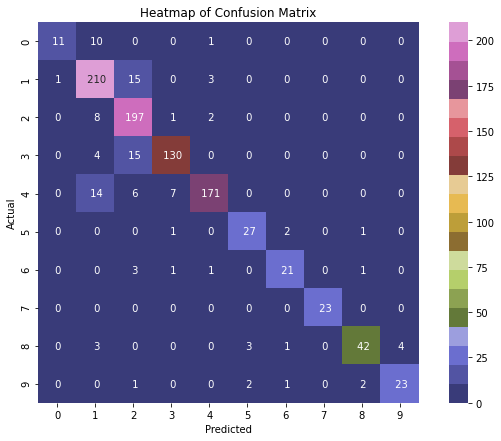

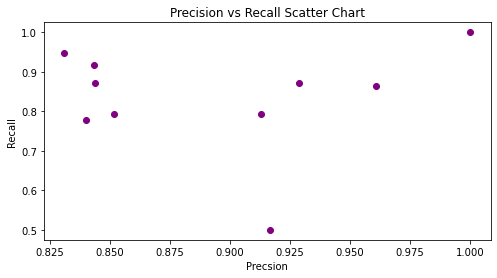



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4536 - accuracy: 0.4616
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9649 - accuracy: 0.6584
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6641 - accuracy: 0.7618
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.4978 - accuracy: 0.8286
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.2858 - accuracy: 0.9009
Score for fold 7: loss of 0.285823583602905

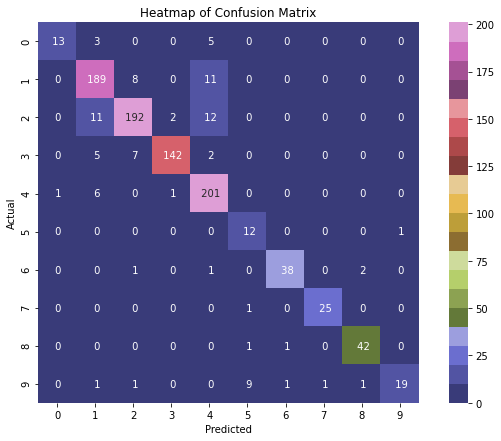

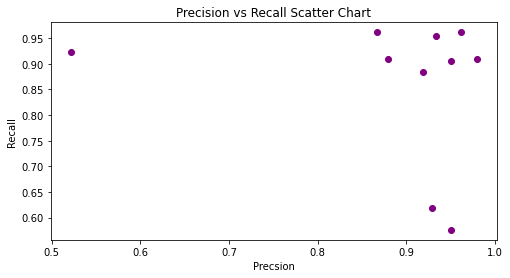



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4530 - accuracy: 0.4583
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8893 - accuracy: 0.6911
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7074 - accuracy: 0.7531
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5494 - accuracy: 0.8092
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8431
Score for fold 8: loss of 0.391072690486907

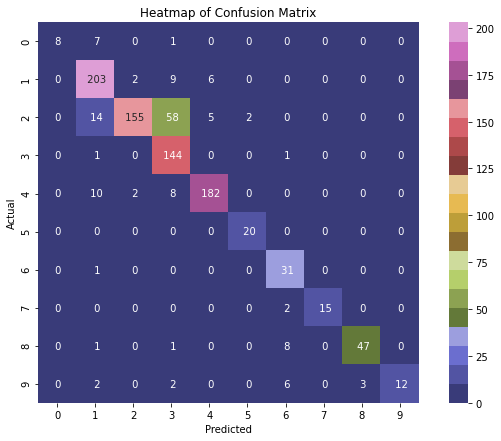

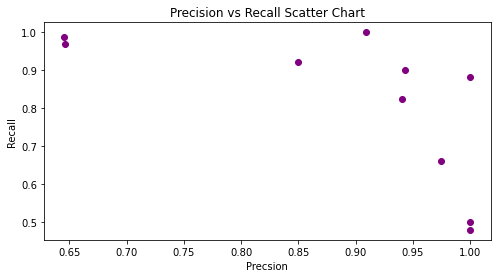



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4641 - accuracy: 0.4598
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9590 - accuracy: 0.6617
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6715 - accuracy: 0.7725
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5409 - accuracy: 0.8121
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5103 - accuracy: 0.8318
Score for fold 9: loss of 0.510288894176483

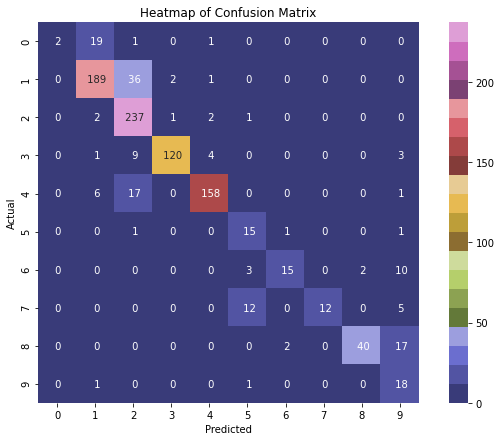

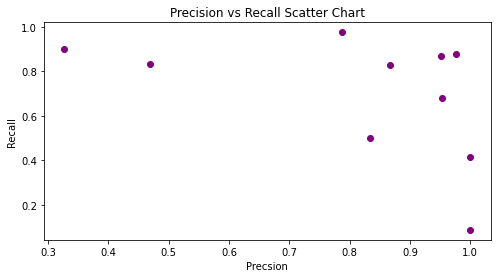



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4872 - accuracy: 0.4489
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9617 - accuracy: 0.6577
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7129 - accuracy: 0.7443
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5367 - accuracy: 0.8124
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3739 - accuracy: 0.8638
Score for fold 10: loss of 0.3739094436168

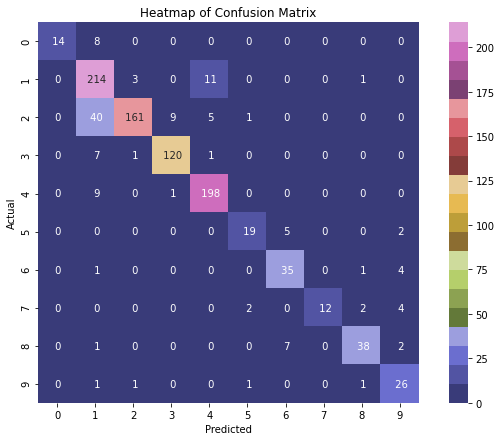

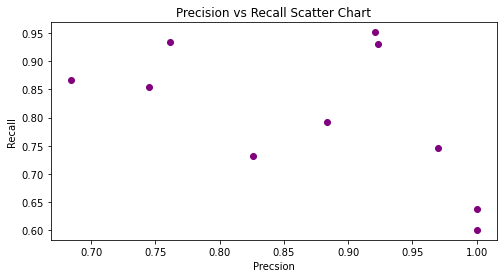



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.30561184883117676 - Accuracy: 89.37048316001892%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.4240078926086426 - Accuracy: 85.13931632041931%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.5666638016700745 - Accuracy: 81.11454844474792%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.5040469765663147 - Accuracy: 82.35294222831726%
--------------------------------------------------------------

In [13]:
neural_network(hidden_layers=2, neurons=100, l_rate=0.01, epochs=5, momentum=0.9)

# Learning Rate = 0.02

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5126 - accuracy: 0.4190
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.0406 - accuracy: 0.6171
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9300 - accuracy: 0.6705
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7039 - accuracy: 0.7520
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.7730
Score for fold 1: loss of 0.628542959690094; accuracy of 77.29617953300476%
Confusion Matrix:
[[ 10   1   0   0   5   0   0   0   0   0]
 [ 19 198   2   0   8   0   0   0   2   0]
 [  1  84 114  18   8   0   0   0   0   1]
 [  0   8   1 134   0   0   3   0   1   

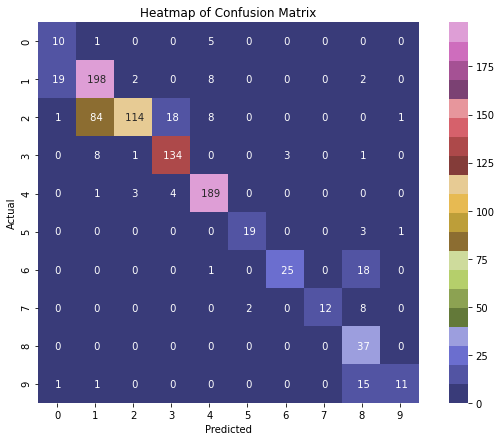

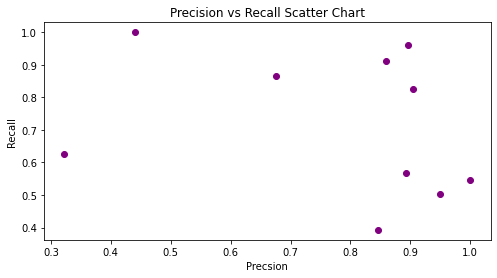



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5091 - accuracy: 0.4173
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.1659 - accuracy: 0.5738
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 1.0804 - accuracy: 0.6097
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7471 - accuracy: 0.7239
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.7316 - accuracy: 0.7564
Score for fold 2: loss of 0.731643617153167

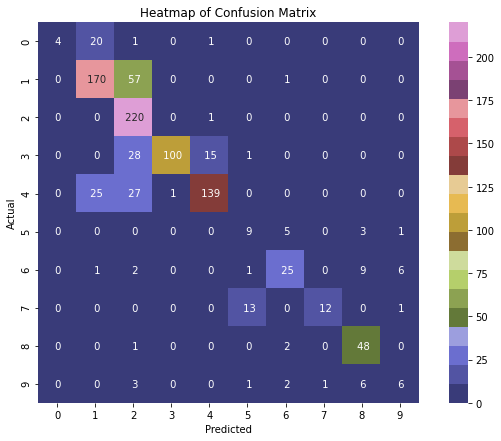

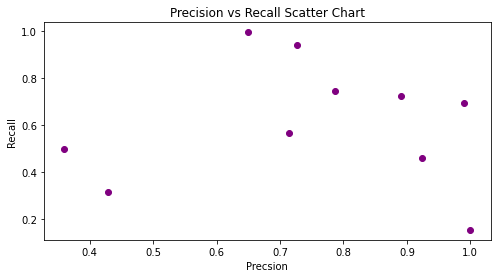



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 5s 17ms/step - loss: 1.5226 - accuracy: 0.4214
Epoch 2/5
273/273 [==============================] - 5s 17ms/step - loss: 1.1072 - accuracy: 0.5883
Epoch 3/5
273/273 [==============================] - 5s 18ms/step - loss: 0.8657 - accuracy: 0.6864
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6958 - accuracy: 0.7490
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6273 - accuracy: 0.7853
Score for fold 3: loss of 0.627289235591888

<ipython-input-5-cc40ee183db9>:69: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)
<ipython-input-5-cc40ee183db9>:75: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2 * (Precision * Recall) / (Precision + Recall)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


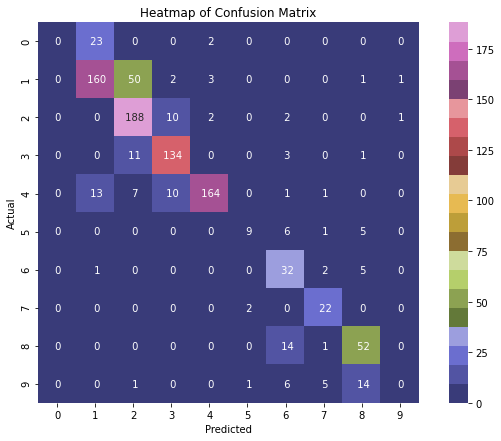

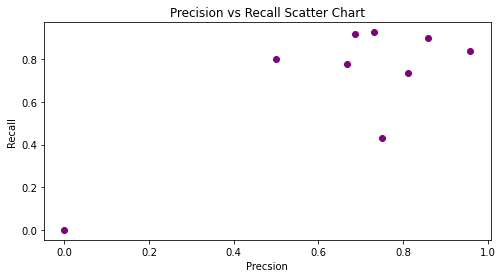



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5612 - accuracy: 0.3971
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.1944 - accuracy: 0.5525
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9295 - accuracy: 0.6667
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8192 - accuracy: 0.6953
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.8318
Score for fold 4: loss of 0.471114605665206

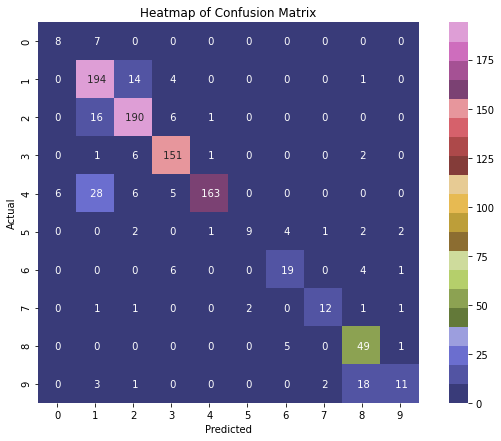

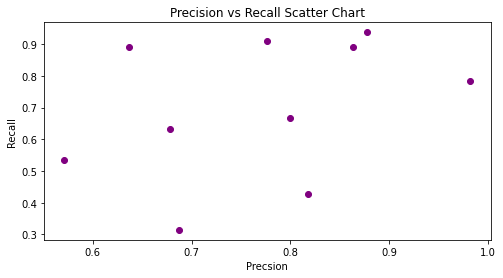



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5340 - accuracy: 0.4207
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.1070 - accuracy: 0.5952
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8375 - accuracy: 0.6997
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7011 - accuracy: 0.7452
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.7534
Score for fold 5: loss of 0.640384554862976

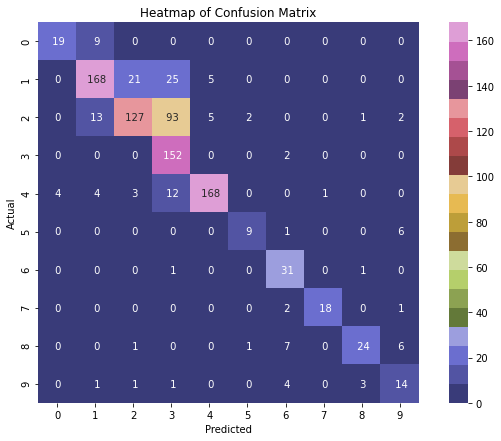

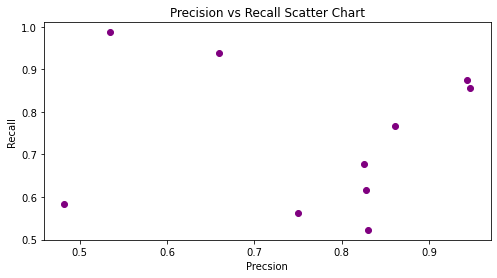



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.5486 - accuracy: 0.4043
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.0973 - accuracy: 0.5834
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8903 - accuracy: 0.6819
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7071 - accuracy: 0.7435
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.7761
Score for fold 6: loss of 0.652204036712646

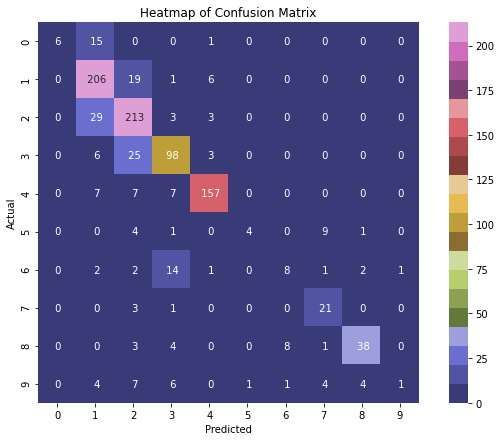

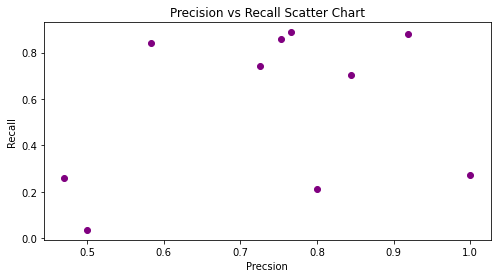



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4978 - accuracy: 0.4366
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.0974 - accuracy: 0.5905
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8664 - accuracy: 0.6911
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7373 - accuracy: 0.7350
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4507 - accuracy: 0.8390
Score for fold 7: loss of 0.450716584920883

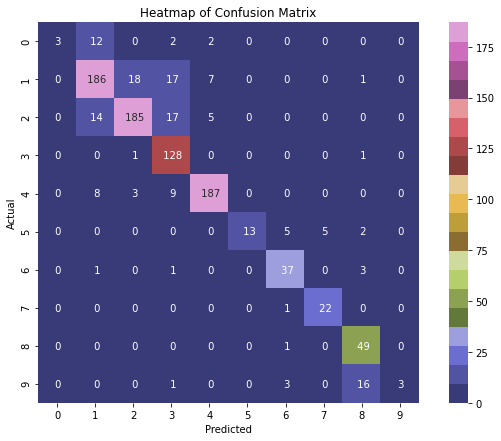

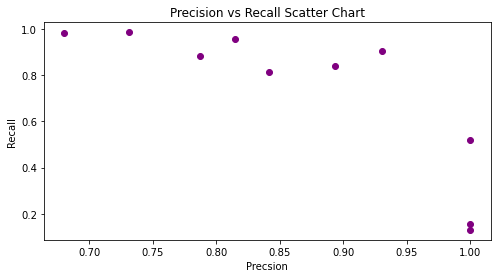



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5154 - accuracy: 0.4157
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.1692 - accuracy: 0.5667
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8882 - accuracy: 0.6694
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6688 - accuracy: 0.7530
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.7490 - accuracy: 0.7028
Score for fold 8: loss of 0.748985469341278

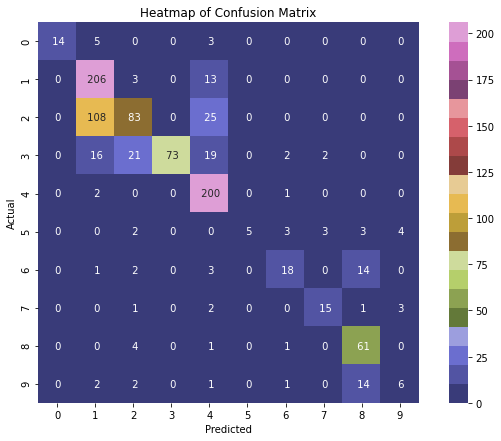

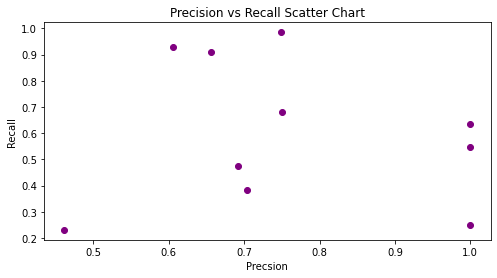



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4882 - accuracy: 0.4274
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.0453 - accuracy: 0.6166
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8044 - accuracy: 0.7060
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8475 - accuracy: 0.6885
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.7181 - accuracy: 0.7544
Score for fold 9: loss of 0.718092262744903

<ipython-input-5-cc40ee183db9>:69: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


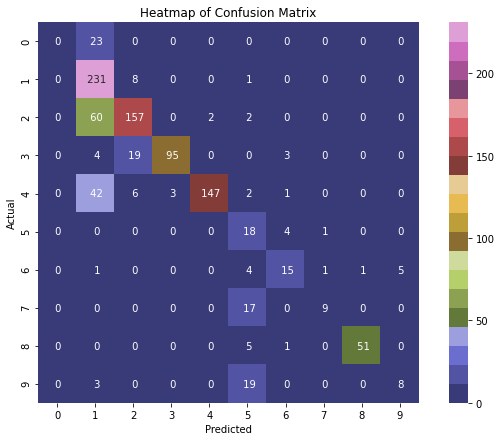

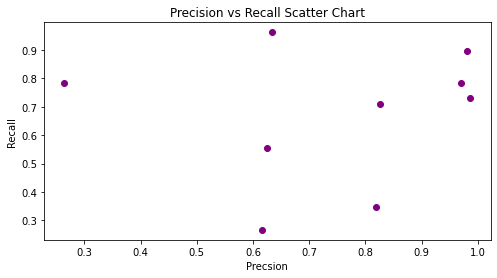



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4524 - accuracy: 0.4529
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.0458 - accuracy: 0.6146
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8916 - accuracy: 0.6769
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7486 - accuracy: 0.7335
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.8008
Score for fold 10: loss of 0.5540537834167

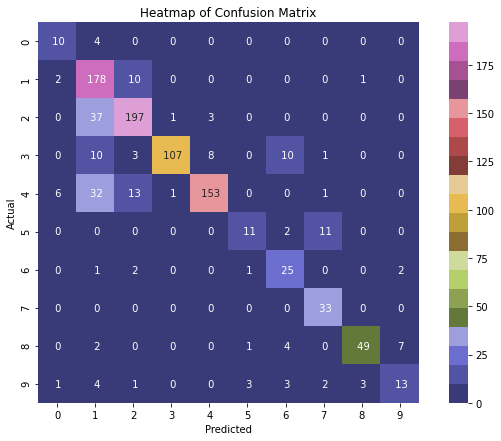

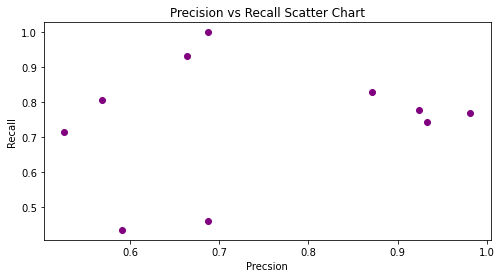



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.628542959690094 - Accuracy: 77.29617953300476%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.7316436171531677 - Accuracy: 75.64499378204346%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.6272892355918884 - Accuracy: 78.5345733165741%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.4711146056652069 - Accuracy: 83.17853212356567%
-----------------------------------------------------------------

In [14]:
neural_network(hidden_layers=2, neurons=100, l_rate=0.02, epochs=5, momentum=0.9)

# Epochs (Other Parameters remain Constant)

# Epochs = 5

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4380 - accuracy: 0.4616
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9683 - accuracy: 0.6637
Epoch 3/5
273/273 [==============================] - 4s 14ms/step - loss: 0.7108 - accuracy: 0.7548
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5753 - accuracy: 0.7910
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.7523
Score for fold 1: loss of 0.6402612924575806; accuracy of 75.23219585418701%
Confusion Matrix:
[[  7   8   0   1   0   0   0   0   0   1]
 [  0 144  54   4   0   0   0   0   0   2]
 [  0   2 189   7   0   1   0   0   0   3]
 [  0   0   3 137   0   0   0   0   0  

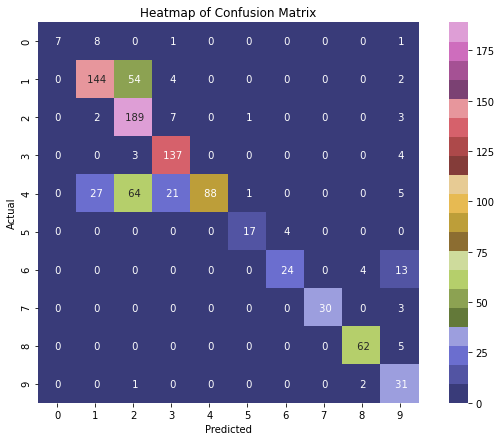

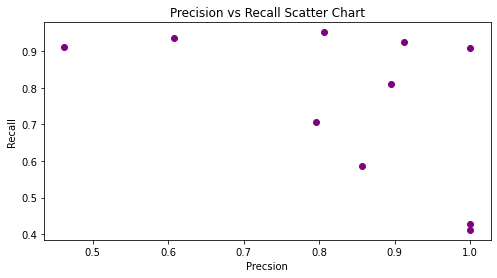



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4359 - accuracy: 0.4657
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8932 - accuracy: 0.6856
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6743 - accuracy: 0.7618
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5245 - accuracy: 0.8128
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.8545
Score for fold 2: loss of 0.470309585332870

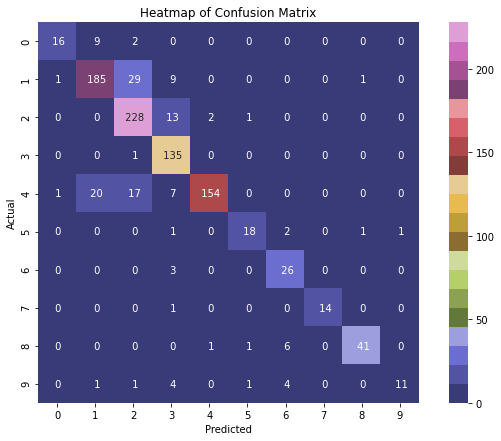

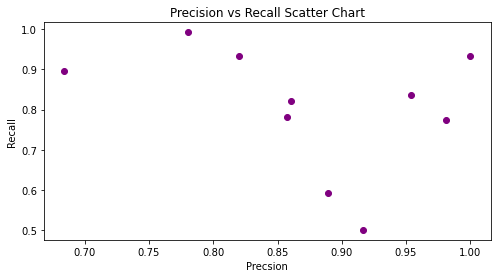



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4936 - accuracy: 0.4407
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9565 - accuracy: 0.6588
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7132 - accuracy: 0.7476
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5478 - accuracy: 0.8056
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.8163
Score for fold 3: loss of 0.574610829353332

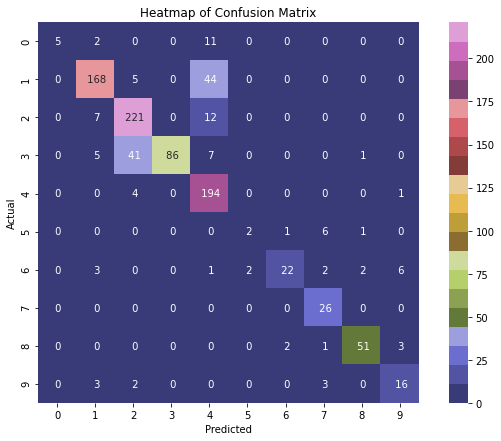

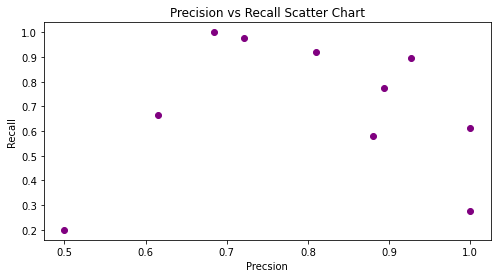



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4701 - accuracy: 0.4509
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8705 - accuracy: 0.6944
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6858 - accuracy: 0.7624
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5124 - accuracy: 0.8173
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.8493
Score for fold 4: loss of 0.431436598300933

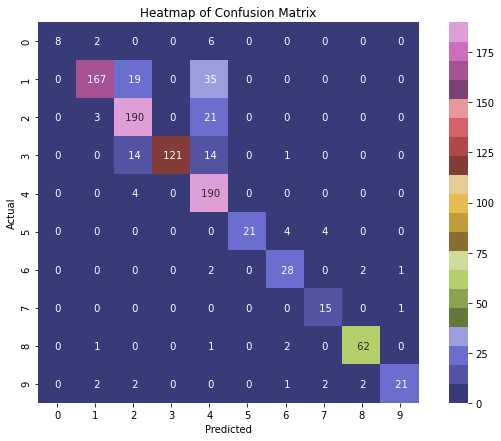

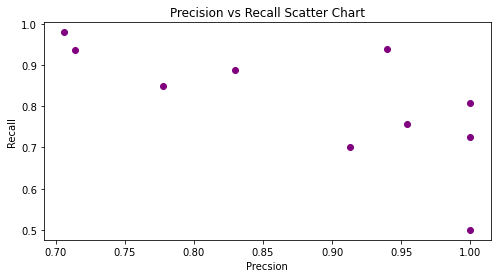



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4987 - accuracy: 0.4284
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9249 - accuracy: 0.6698
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6587 - accuracy: 0.7718
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5136 - accuracy: 0.8214
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3687 - accuracy: 0.8679
Score for fold 5: loss of 0.368738055229187

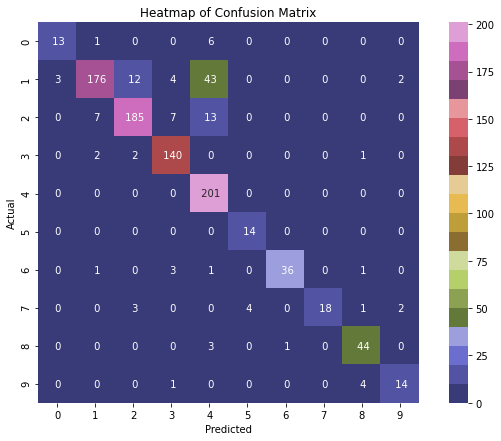

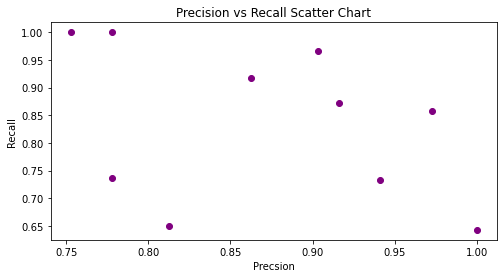



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4633 - accuracy: 0.4558
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9983 - accuracy: 0.6387
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7089 - accuracy: 0.7513
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5917 - accuracy: 0.7919
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.8369
Score for fold 6: loss of 0.477948725223541

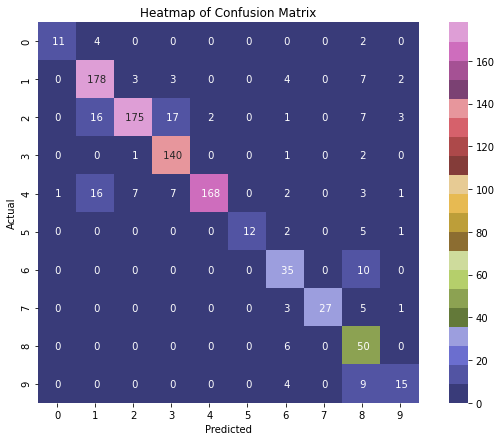

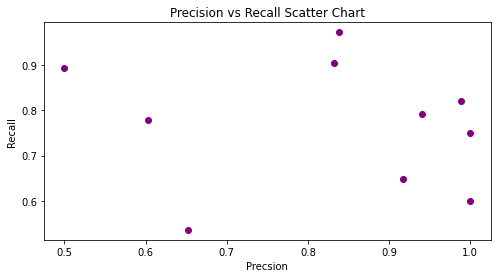



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4368 - accuracy: 0.4588
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.8707 - accuracy: 0.6893
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.7004 - accuracy: 0.7552
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6432 - accuracy: 0.7779
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.8029
Score for fold 7: loss of 0.599198818206787

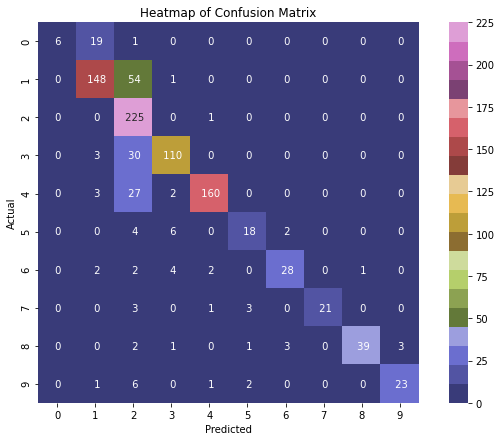

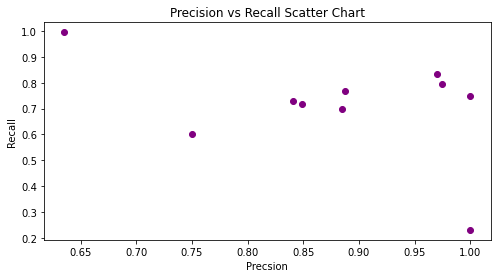



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4533 - accuracy: 0.4639
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9510 - accuracy: 0.6610
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6582 - accuracy: 0.7728
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5202 - accuracy: 0.8189
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.9082
Score for fold 8: loss of 0.296185165643692

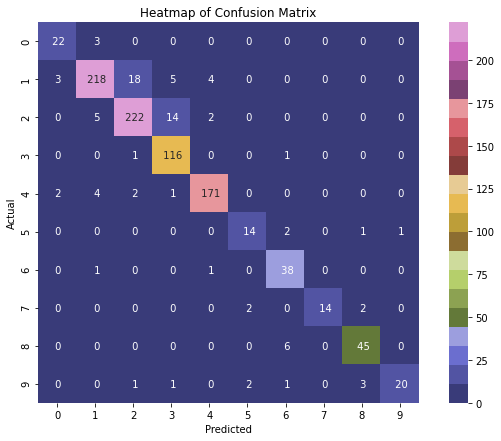

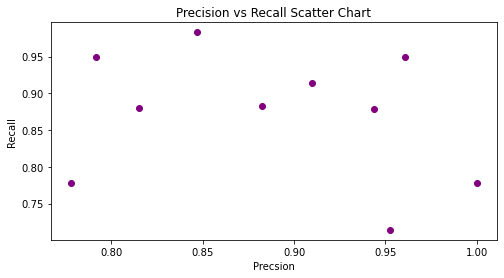



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4671 - accuracy: 0.4483
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9330 - accuracy: 0.6717
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6619 - accuracy: 0.7717
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.5240 - accuracy: 0.8176
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8978
Score for fold 9: loss of 0.312728136777877

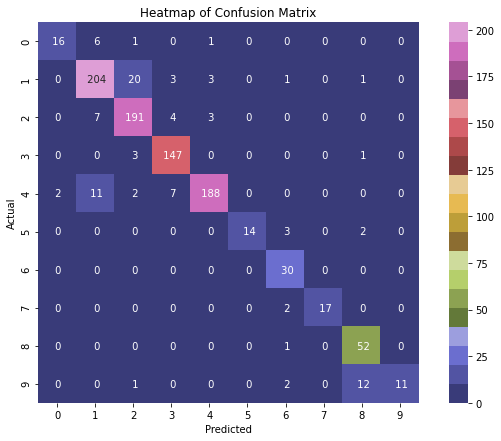

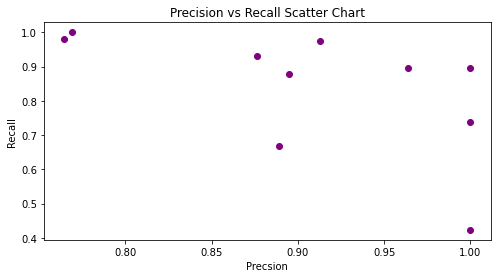



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 4s 15ms/step - loss: 1.4458 - accuracy: 0.4637
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9609 - accuracy: 0.6555
Epoch 3/5
273/273 [==============================] - 4s 15ms/step - loss: 0.6715 - accuracy: 0.7598
Epoch 4/5
273/273 [==============================] - 4s 15ms/step - loss: 0.4783 - accuracy: 0.8280
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8854
Score for fold 10: loss of 0.3620751798152

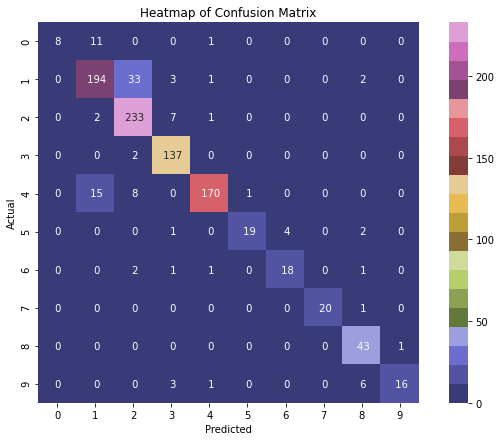

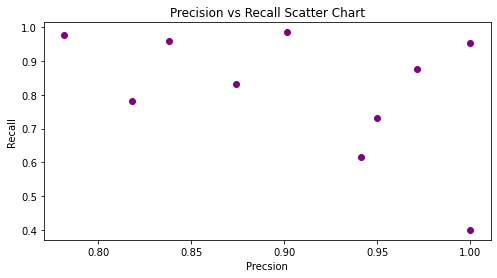



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.6402612924575806 - Accuracy: 75.23219585418701%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.4703095853328705 - Accuracy: 85.44891476631165%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.5746108293533325 - Accuracy: 81.63054585456848%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.43143659830093384 - Accuracy: 84.93292331695557%
--------------------------------------------------------------

In [15]:
neural_network(hidden_layers=2, neurons=100, l_rate=0.01, epochs=5, momentum=0.9)

# Epochs = 10

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
273/273 [==============================] - 4s 15ms/step - loss: 1.4721 - accuracy: 0.4557
Epoch 2/10
273/273 [==============================] - 4s 16ms/step - loss: 0.9387 - accuracy: 0.6722
Epoch 3/10
273/273 [==============================] - 4s 15ms/step - loss: 0.6963 - accuracy: 0.7551
Epoch 4/10
273/273 [==============================] - 4s 15ms/step - loss: 0.5623 - accuracy: 0.7992
Epoch 5/10
273/273 [==============================] - 4s 15ms/step - loss: 0.4517 - accuracy: 0.8426
Epoch 6/10
273/273 [==============================] - 4s 15ms/step - loss: 0.3700 - accuracy: 0.8724
Epoch 7/10
273/273 [==============================] - 4s 15ms/step - loss: 0.3293 - accuracy: 0.8837
Epoch 8/10
273/273 [==============================] -

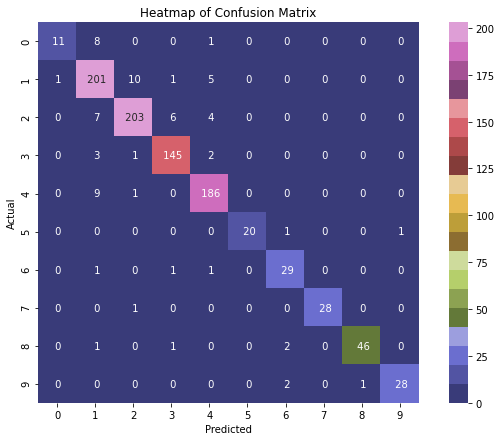

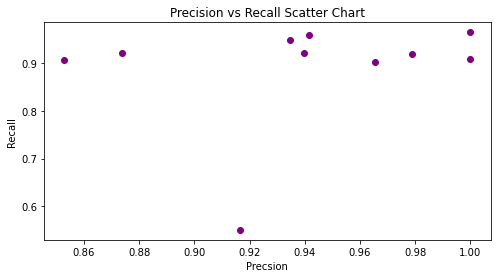



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
273/273 [==============================] - 4s 15ms/step - loss: 1.4185 - accuracy: 0.4865
Epoch 2/10
273/273 [==============================] - 4s 15ms/step - loss: 0.9165 - accuracy: 0.6749
Epoch 3/10
273/273 [==============================] - 4s 15ms/step - loss: 0.6231 - accuracy: 0.7839
Epoch 4/10
273/273 [==============================] - 4s 15ms/step - loss: 0.5598 - accuracy: 0.8000
Epoch 5/10
273/273 [==============================] - 4s 15ms/step - loss: 0.4521 - accuracy: 0.8407
Epoch 6/10
273/273 [===============

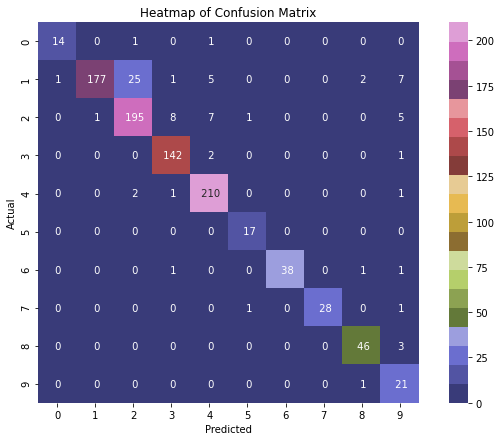

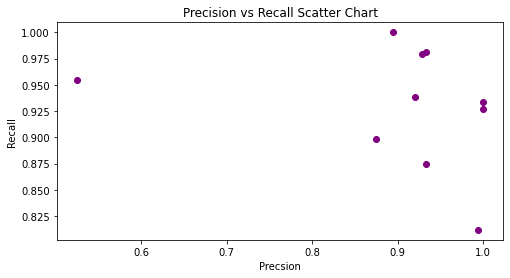



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
273/273 [==============================] - 4s 15ms/step - loss: 1.4630 - accuracy: 0.4551
Epoch 2/10
273/273 [==============================] - 4s 15ms/step - loss: 0.9467 - accuracy: 0.6624
Epoch 3/10
273/273 [==============================] - 4s 15ms/step - loss: 0.7301 - accuracy: 0.7527
Epoch 4/10
273/273 [==============================] - 4s 15ms/step - loss: 0.6077 - accuracy: 0.7874
Epoch 5/10
273/273 [==============================] - 4s 15ms/step - loss: 0.4940 - accuracy: 0.8290
Epoch 6/10
273/273 [===============

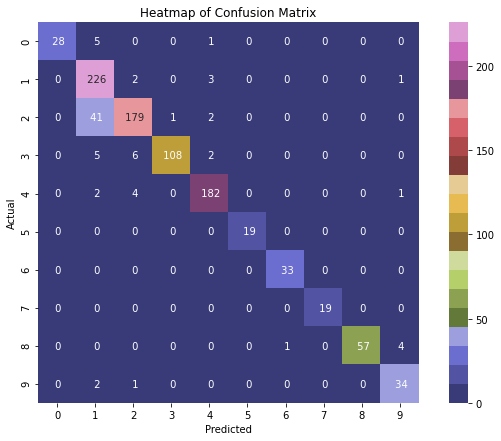

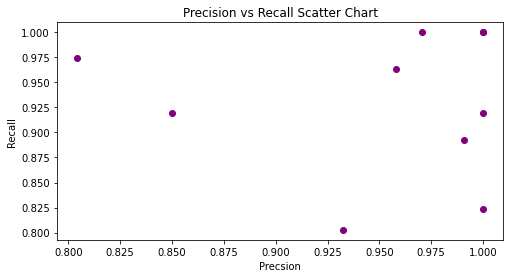



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
273/273 [==============================] - 4s 15ms/step - loss: 1.4669 - accuracy: 0.4522
Epoch 2/10
273/273 [==============================] - 4s 15ms/step - loss: 0.9229 - accuracy: 0.6663
Epoch 3/10
273/273 [==============================] - 4s 15ms/step - loss: 0.6600 - accuracy: 0.7636
Epoch 4/10
273/273 [==============================] - 4s 15ms/step - loss: 0.4567 - accuracy: 0.8398
Epoch 5/10
273/273 [==============================] - 4s 15ms/step - loss: 0.4817 - accuracy: 0.8327
Epoch 6/10
273/273 [===============

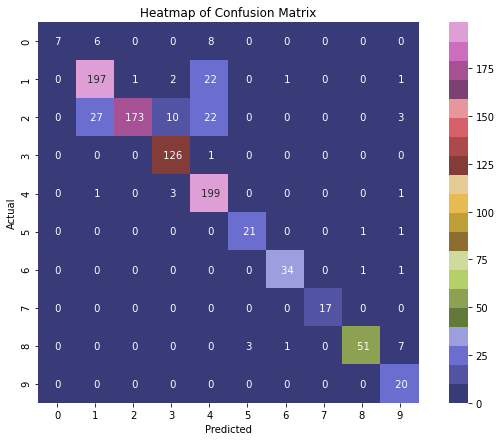

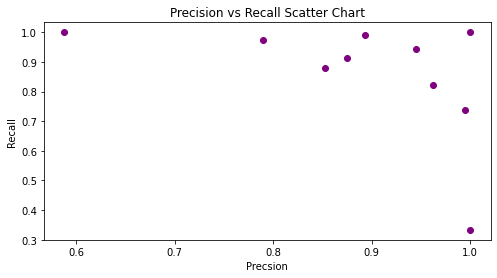



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
273/273 [==============================] - 4s 15ms/step - loss: 1.4341 - accuracy: 0.4577
Epoch 2/10
273/273 [==============================] - 4s 15ms/step - loss: 0.9844 - accuracy: 0.6424
Epoch 3/10
273/273 [==============================] - 4s 15ms/step - loss: 0.7170 - accuracy: 0.7429
Epoch 4/10
273/273 [==============================] - 4s 15ms/step - loss: 0.5348 - accuracy: 0.8085
Epoch 5/10
273/273 [==============================] - 4s 15ms/step - loss: 0.4452 - accuracy: 0.8428
Epoch 6/10
273/273 [===============

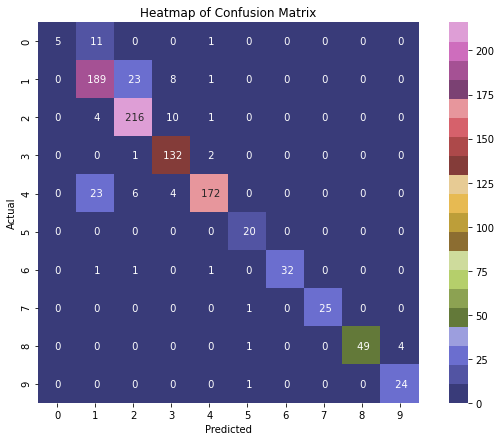

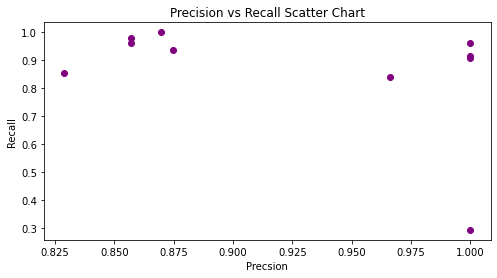



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/10
273/273 [==============================] - 4s 16ms/step - loss: 1.4833 - accuracy: 0.4451
Epoch 2/10
273/273 [==============================] - 4s 16ms/step - loss: 0.9418 - accuracy: 0.6715
Epoch 3/10
273/273 [==============================] - 4s 16ms/step - loss: 0.6836 - accuracy: 0.7670
Epoch 4/10
273/273 [==============================] - 4s 16ms/step - loss: 0.5855 - accuracy: 0.7957
Epoch 5/10
273/273 [==============================] - 4s 16ms/step - loss: 0.4451 - accuracy: 0.8427
Epoch 6/10
273/273 [===============

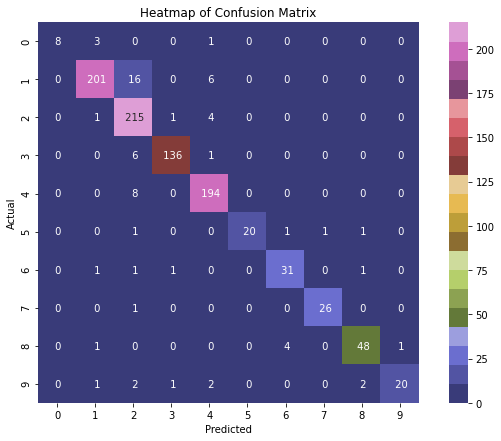

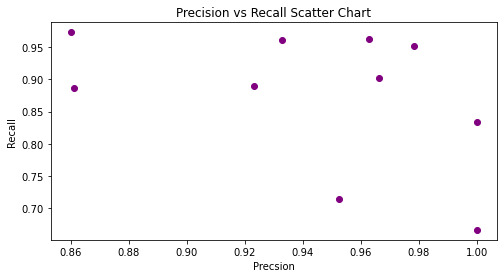



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/10
273/273 [==============================] - 4s 16ms/step - loss: 1.4847 - accuracy: 0.4491
Epoch 2/10
273/273 [==============================] - 4s 16ms/step - loss: 0.9356 - accuracy: 0.6654
Epoch 3/10
273/273 [==============================] - 4s 16ms/step - loss: 0.7687 - accuracy: 0.7350
Epoch 4/10
273/273 [==============================] - 4s 16ms/step - loss: 0.5431 - accuracy: 0.8116
Epoch 5/10
273/273 [==============================] - 4s 16ms/step - loss: 0.4778 - accuracy: 0.8316
Epoch 6/10
273/273 [===============

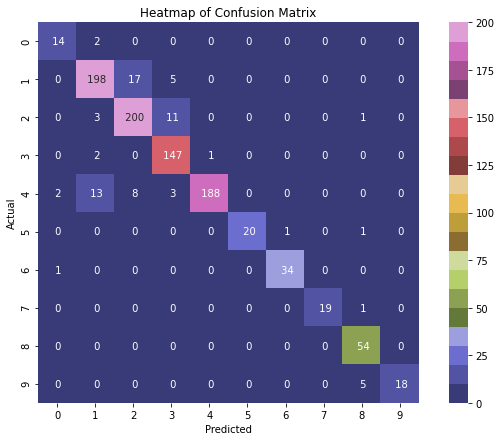

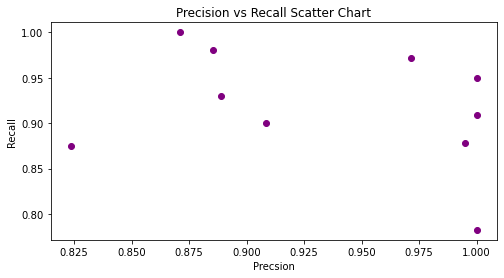



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/10
273/273 [==============================] - 4s 16ms/step - loss: 1.4527 - accuracy: 0.4653
Epoch 2/10
273/273 [==============================] - 4s 16ms/step - loss: 0.8743 - accuracy: 0.6833
Epoch 3/10
273/273 [==============================] - 4s 16ms/step - loss: 0.7445 - accuracy: 0.7345
Epoch 4/10
273/273 [==============================] - 4s 16ms/step - loss: 0.5586 - accuracy: 0.8085
Epoch 5/10
273/273 [==============================] - 4s 16ms/step - loss: 0.4769 - accuracy: 0.8304
Epoch 6/10
273/273 [===============

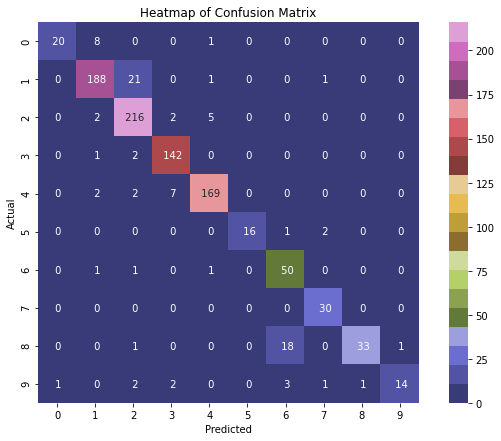

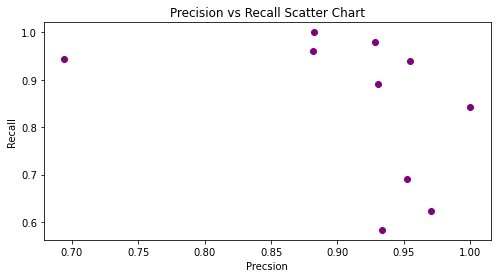



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/10
273/273 [==============================] - 4s 16ms/step - loss: 1.4504 - accuracy: 0.4618
Epoch 2/10
273/273 [==============================] - 4s 16ms/step - loss: 0.9329 - accuracy: 0.6706
Epoch 3/10
273/273 [==============================] - 4s 16ms/step - loss: 0.6487 - accuracy: 0.7704
Epoch 4/10
273/273 [==============================] - 4s 16ms/step - loss: 0.5714 - accuracy: 0.7918
Epoch 5/10
273/273 [==============================] - 4s 16ms/step - loss: 0.4577 - accuracy: 0.8382
Epoch 6/10
273/273 [===============

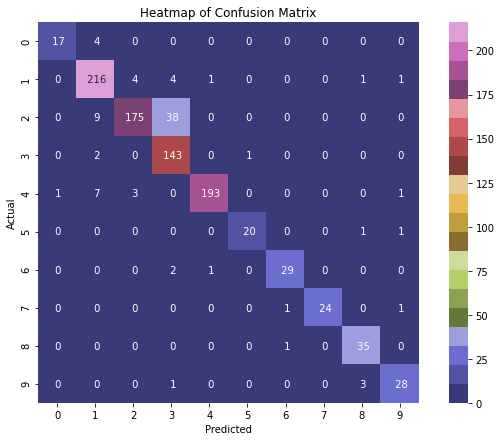

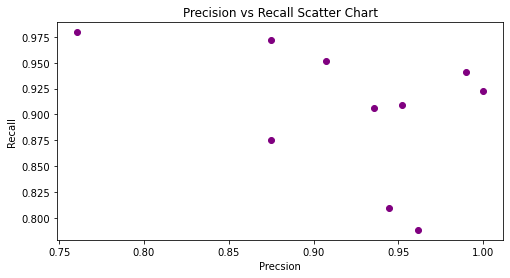



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/10
273/273 [==============================] - 4s 16ms/step - loss: 1.4762 - accuracy: 0.4535
Epoch 2/10
273/273 [==============================] - 4s 16ms/step - loss: 0.9031 - accuracy: 0.6789
Epoch 3/10
273/273 [==============================] - 4s 16ms/step - loss: 0.6783 - accuracy: 0.7633
Epoch 4/10
273/273 [==============================] - 4s 16ms/step - loss: 0.5360 - accuracy: 0.8117
Epoch 5/10
273/273 [==============================] - 4s 16ms/step - loss: 0.4399 - accuracy: 0.8443
Epoch 6/10
273/273 [==============

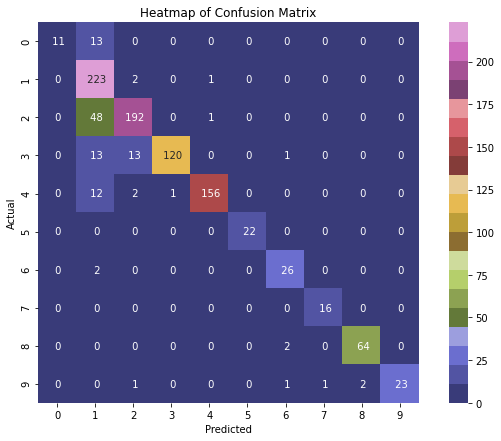

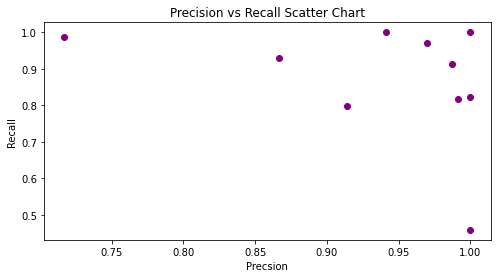



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.2263566553592682 - Accuracy: 92.5696611404419%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.2612837851047516 - Accuracy: 91.64086580276489%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.22452397644519806 - Accuracy: 91.33126735687256%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.36392083764076233 - Accuracy: 87.20329999923706%
--------------------------------------------------------------

In [16]:
neural_network(hidden_layers=2, neurons=100, l_rate=0.01, epochs=10, momentum=0.9)

# Momentum (Other Parameters remain Constant)

# Momentum = 0.5

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5623 - accuracy: 0.4369
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.0895 - accuracy: 0.6205
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8270 - accuracy: 0.7339
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6666 - accuracy: 0.7890
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.7843
Score for fold 1: loss of 0.6391041874885559; accuracy of 78.43137383460999%
Confusion Matrix:
[[ 13   0   0   0   2   0   0   0   3   0]
 [  7 168   7  27   0   0   0   0   7   1]
 [  0   2 144  74   2   0   0   0   1   1]
 [  0   0   0 132   0   0   0   0   0  

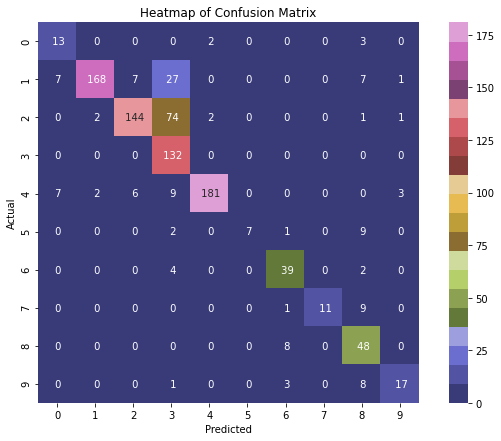

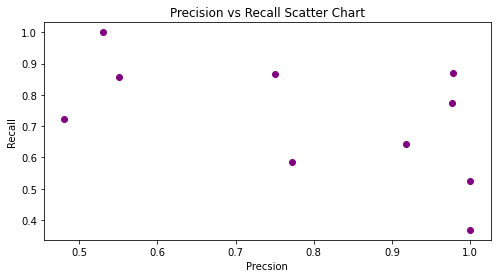



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.6346 - accuracy: 0.4094
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 1.1464 - accuracy: 0.6025
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8654 - accuracy: 0.7154
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6933 - accuracy: 0.7756
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.7647
Score for fold 2: loss of 0.652277052402496

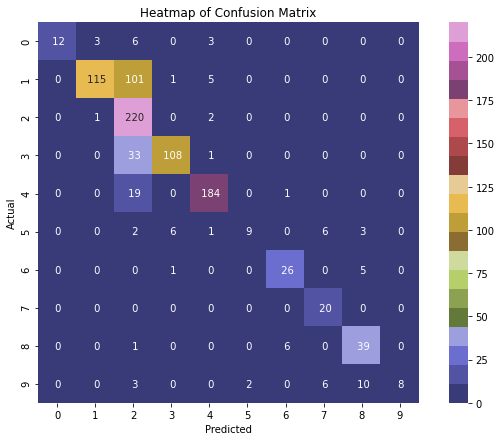

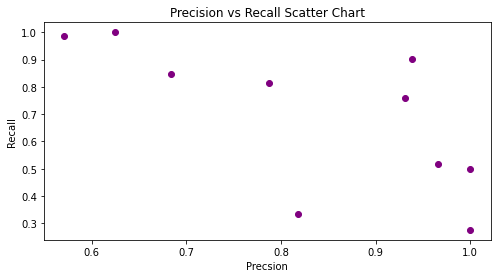



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5528 - accuracy: 0.4420
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.0927 - accuracy: 0.6200
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8158 - accuracy: 0.7325
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6363 - accuracy: 0.8001
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.7874
Score for fold 3: loss of 0.644433975219726

<ipython-input-5-cc40ee183db9>:69: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


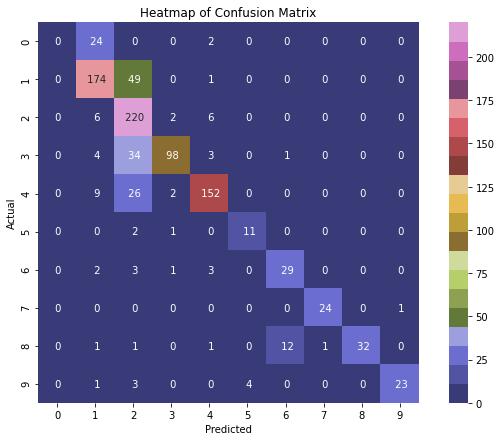

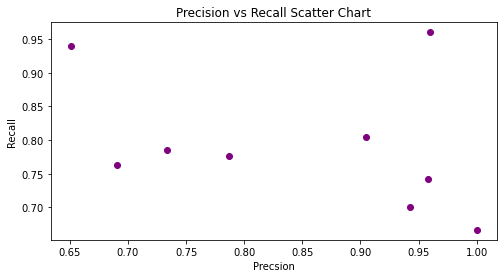



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5687 - accuracy: 0.4505
Epoch 2/5
273/273 [==============================] - 5s 17ms/step - loss: 1.0521 - accuracy: 0.6427
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7982 - accuracy: 0.7479
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6278 - accuracy: 0.8008
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.8442
Score for fold 4: loss of 0.482808917760849

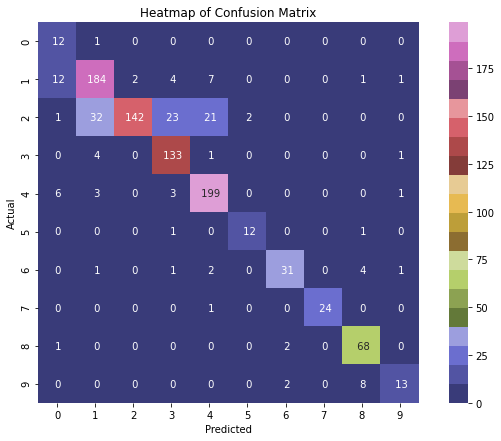

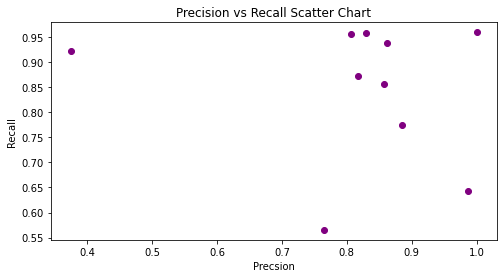



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.6584 - accuracy: 0.4037
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.1452 - accuracy: 0.5999
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8455 - accuracy: 0.7251
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6996 - accuracy: 0.7789
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.5926 - accuracy: 0.8235
Score for fold 5: loss of 0.592597484588623

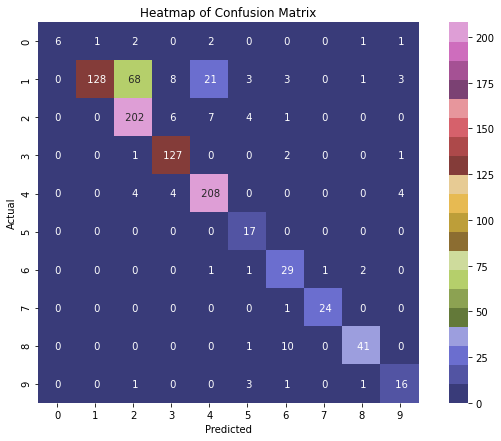

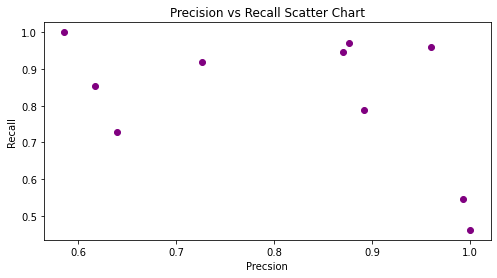



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.6314 - accuracy: 0.4191
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.1171 - accuracy: 0.6214
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8479 - accuracy: 0.7256
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6781 - accuracy: 0.7876
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4956 - accuracy: 0.8607
Score for fold 6: loss of 0.495626568794250

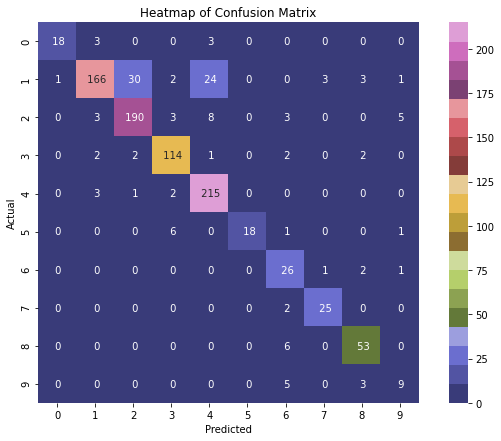

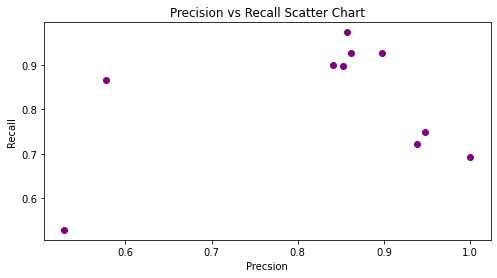



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.6098 - accuracy: 0.4224
Epoch 2/5
273/273 [==============================] - 5s 17ms/step - loss: 1.1328 - accuracy: 0.5984
Epoch 3/5
273/273 [==============================] - 5s 17ms/step - loss: 0.8607 - accuracy: 0.7157
Epoch 4/5
273/273 [==============================] - 5s 17ms/step - loss: 0.7062 - accuracy: 0.7814
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.8586
Score for fold 7: loss of 0.477062463760376

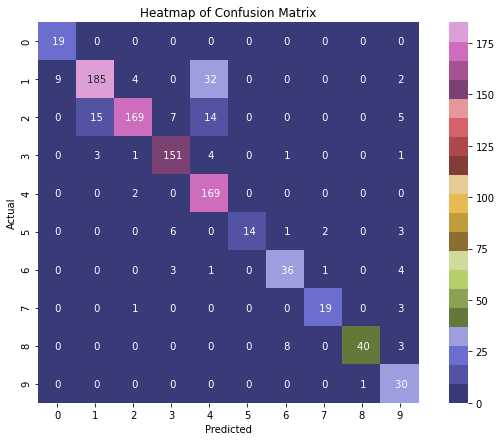

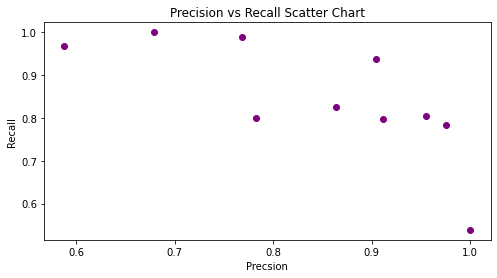



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5806 - accuracy: 0.4365
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.1051 - accuracy: 0.6232
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8396 - accuracy: 0.7290
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6837 - accuracy: 0.7851
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.8679
Score for fold 8: loss of 0.441362231969833

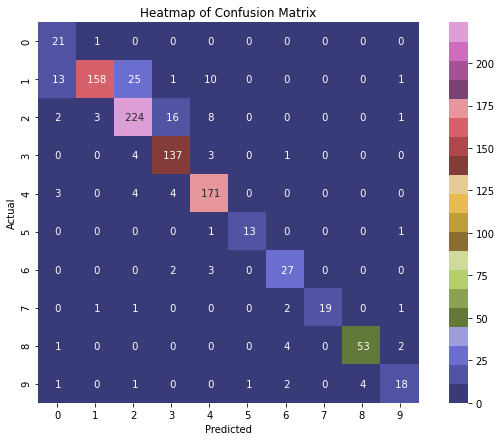

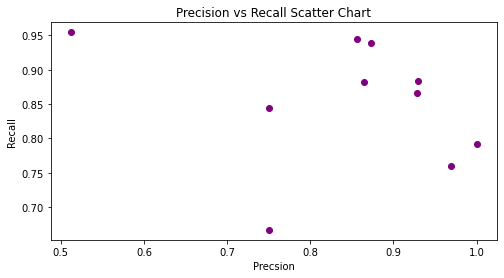



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5987 - accuracy: 0.4311
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.1096 - accuracy: 0.6085
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8447 - accuracy: 0.7211
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6802 - accuracy: 0.7890
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6037 - accuracy: 0.7843
Score for fold 9: loss of 0.603663504123687

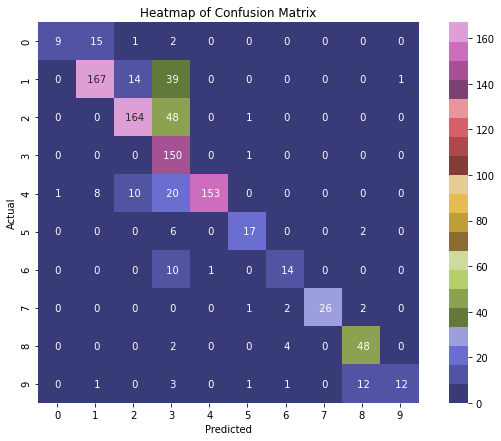

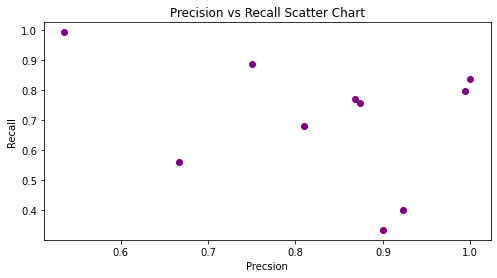



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.6430 - accuracy: 0.4043
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.1841 - accuracy: 0.5739
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9310 - accuracy: 0.6910
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7553 - accuracy: 0.7593
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6216 - accuracy: 0.7792
Score for fold 10: loss of 0.6215735077857

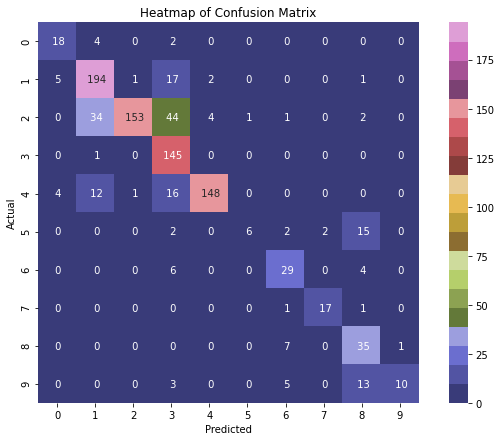

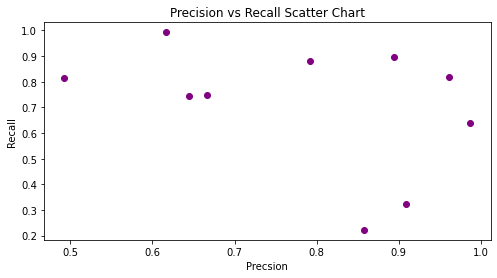



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.6391041874885559 - Accuracy: 78.43137383460999%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.6522770524024963 - Accuracy: 76.47058963775635%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.6444339752197266 - Accuracy: 78.74097228050232%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.482808917760849 - Accuracy: 84.41692590713501%
----------------------------------------------------------------

In [17]:
neural_network(hidden_layers=2, neurons=100, l_rate=0.01, epochs=5, momentum=0.5)

# Momentum = 0.7

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5646 - accuracy: 0.4259
Epoch 2/5
273/273 [==============================] - 5s 16ms/step - loss: 1.0305 - accuracy: 0.6388
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7379 - accuracy: 0.7524
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5974 - accuracy: 0.8075
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8700
Score for fold 1: loss of 0.3851810693740845; accuracy of 86.99690699577332%
Confusion Matrix:
[[ 19   3   1   1   0   0   0   0   0   0]
 [  1 210  24  12   0   0   0   0   0   0]
 [  0   4 178  18   4   0   0   0   0   0]
 [  0   0   1 145   0   0   0   0   0  

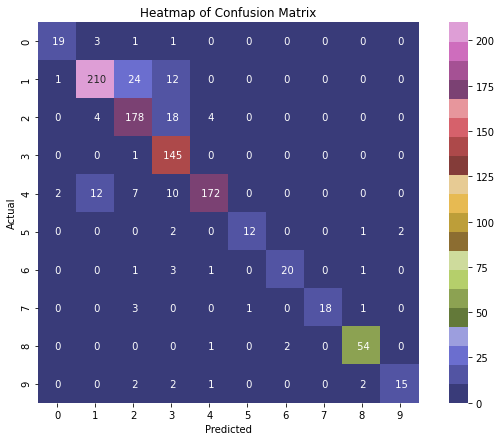

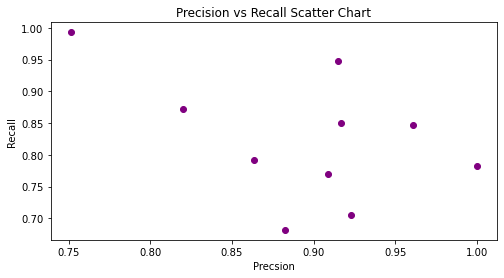



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4899 - accuracy: 0.4569
Epoch 2/5
273/273 [==============================] - 4s 15ms/step - loss: 0.9747 - accuracy: 0.6749
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6829 - accuracy: 0.7843
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5463 - accuracy: 0.8195
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8504
Score for fold 2: loss of 0.411201447248458

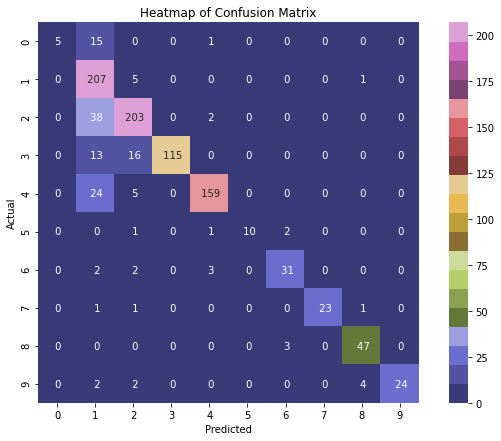

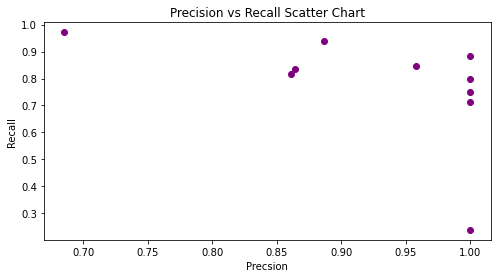



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5022 - accuracy: 0.4486
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9699 - accuracy: 0.6654
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7112 - accuracy: 0.7657
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5523 - accuracy: 0.8232
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.8555
Score for fold 3: loss of 0.498595237731933

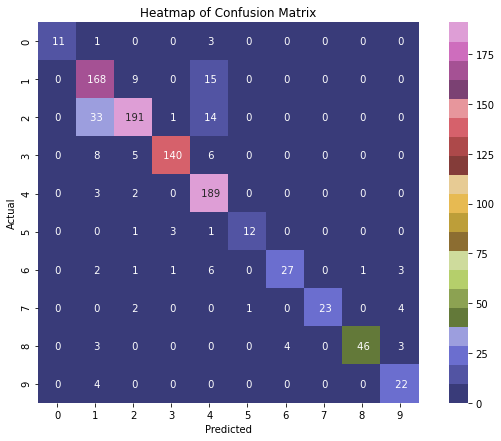

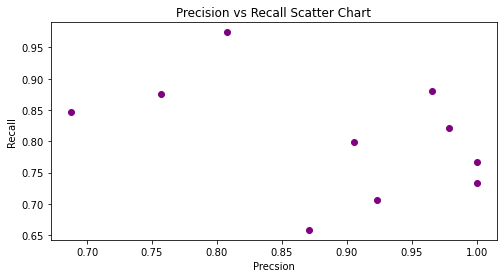



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4991 - accuracy: 0.4495
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 1.0047 - accuracy: 0.6494
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7060 - accuracy: 0.7652
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5601 - accuracy: 0.8170
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8669
Score for fold 4: loss of 0.406871348619461

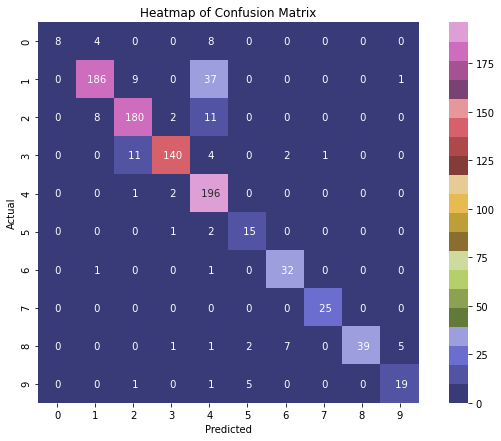

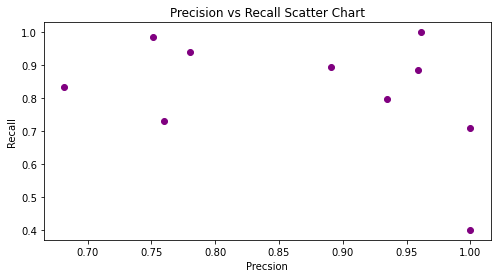



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5267 - accuracy: 0.4482
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9684 - accuracy: 0.6807
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6623 - accuracy: 0.7835
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5581 - accuracy: 0.8226
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.7792
Score for fold 5: loss of 0.646423578262329

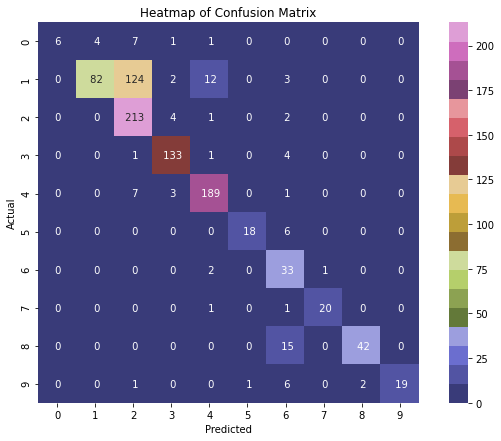

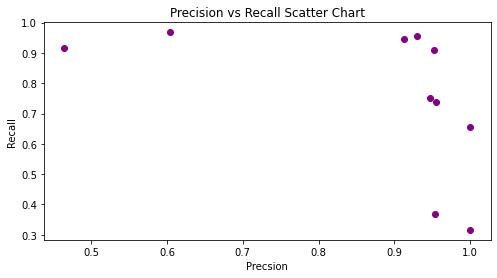



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4740 - accuracy: 0.4756
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9325 - accuracy: 0.6849
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6883 - accuracy: 0.7827
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5153 - accuracy: 0.8369
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.8101
Score for fold 6: loss of 0.652309954166412

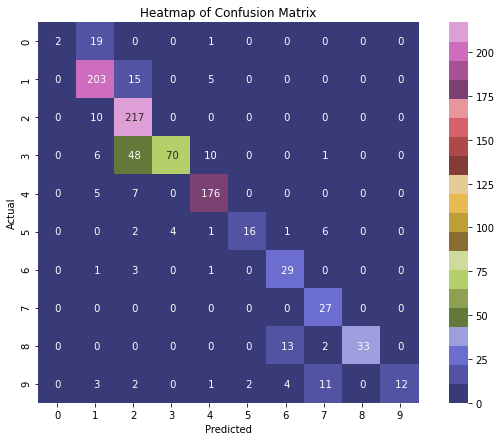

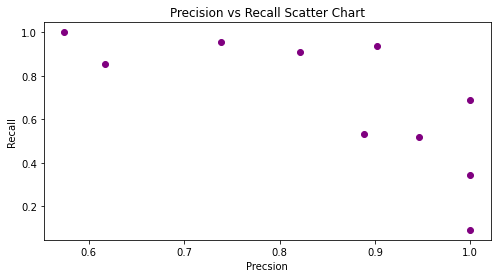



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5458 - accuracy: 0.4541
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9716 - accuracy: 0.6778
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6990 - accuracy: 0.7731
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5677 - accuracy: 0.8223
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8349
Score for fold 7: loss of 0.471737653017044

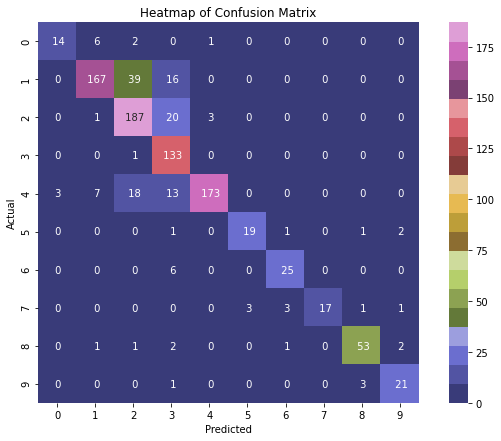

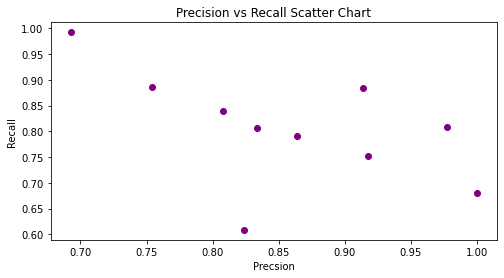



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4988 - accuracy: 0.4516
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9878 - accuracy: 0.6693
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6825 - accuracy: 0.7811
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5520 - accuracy: 0.8251
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.8524
Score for fold 8: loss of 0.433312505483627

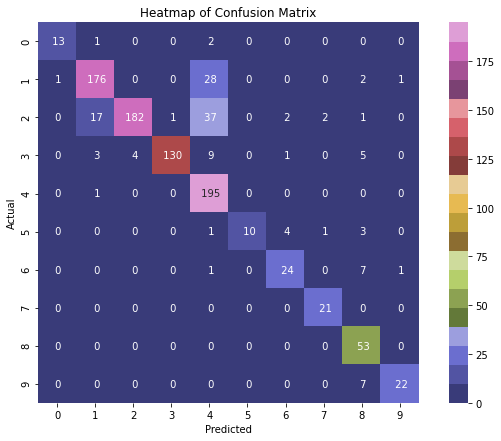

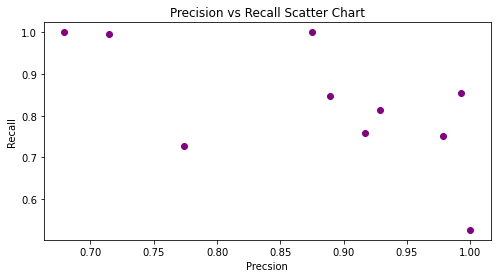



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4672 - accuracy: 0.4568
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9674 - accuracy: 0.6660
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6780 - accuracy: 0.7785
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5123 - accuracy: 0.8348
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.8710 - accuracy: 0.7461
Score for fold 9: loss of 0.870984196662902

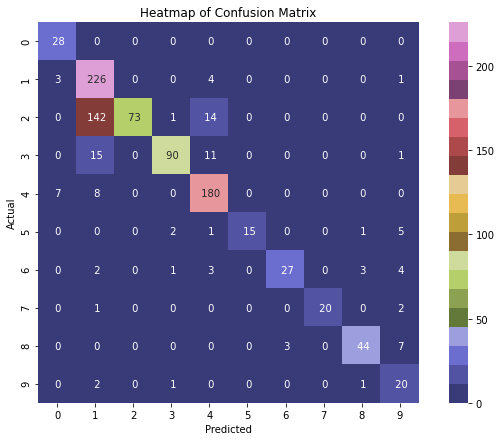

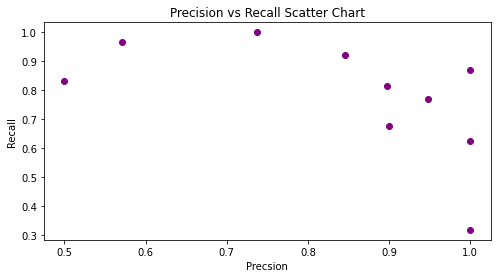



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5106 - accuracy: 0.4526
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9860 - accuracy: 0.6622
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7135 - accuracy: 0.7696
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5137 - accuracy: 0.8355
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8824
Score for fold 10: loss of 0.4062757790088

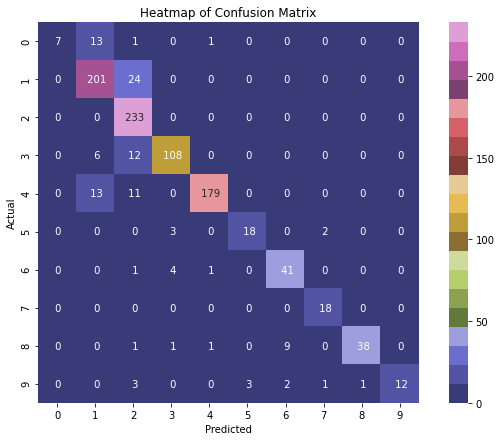

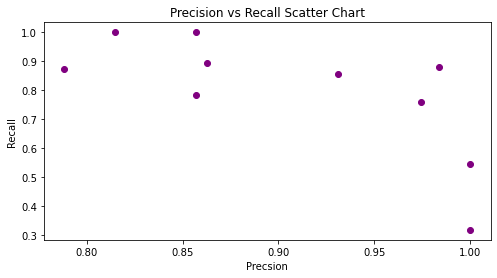



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.3851810693740845 - Accuracy: 86.99690699577332%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.41120144724845886 - Accuracy: 85.0361168384552%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.4985952377319336 - Accuracy: 85.55211424827576%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.40687134861946106 - Accuracy: 86.68730854988098%
--------------------------------------------------------------

In [18]:
neural_network(hidden_layers=2, neurons=100, l_rate=0.01, epochs=5, momentum=0.7)

# Momentum = 0.9

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
273/273 [==============================] - 5s 17ms/step - loss: 1.4942 - accuracy: 0.4361
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9200 - accuracy: 0.6719
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6373 - accuracy: 0.7699
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5155 - accuracy: 0.8162
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3167 - accuracy: 0.8958
Score for fold 1: loss of 0.3167315423488617; accuracy of 89.57688212394714%
Confusion Matrix:
[[ 18   3   0   0   1   0   0   0   0   0]
 [  8 215   9   0  12   0   0   0   0   1]
 [  0  16 213  10   8   0   0   0   0   0]
 [  0   7   0 118   2   0   1   0   0  

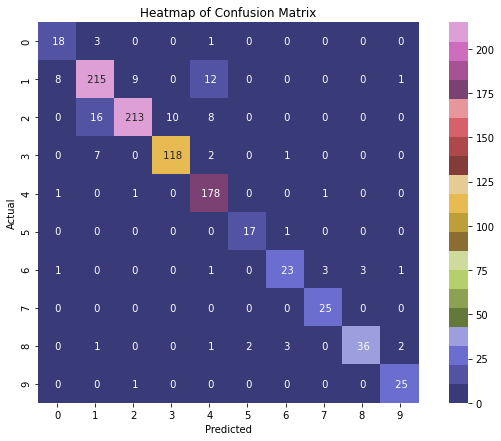

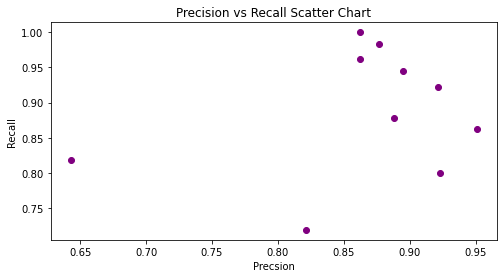



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4942 - accuracy: 0.4442
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9643 - accuracy: 0.6600
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.7211 - accuracy: 0.7508
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5287 - accuracy: 0.8150
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.8854
Score for fold 2: loss of 0.360688954591751

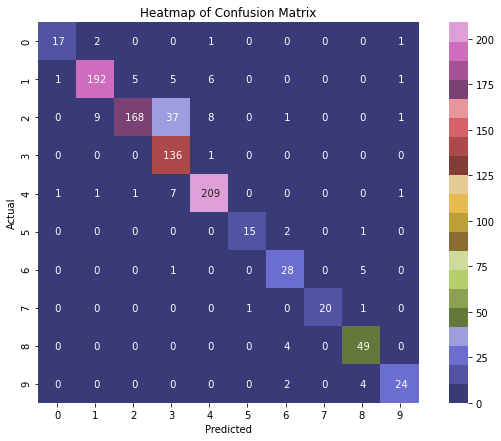

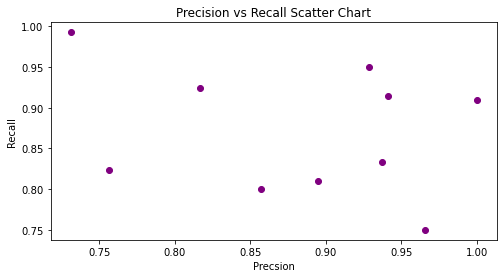



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4689 - accuracy: 0.4533
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8939 - accuracy: 0.6828
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6835 - accuracy: 0.7621
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5320 - accuracy: 0.8133
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.7709
Score for fold 3: loss of 0.665959477424621

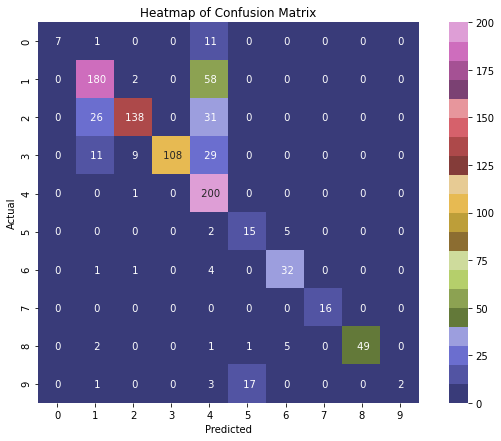

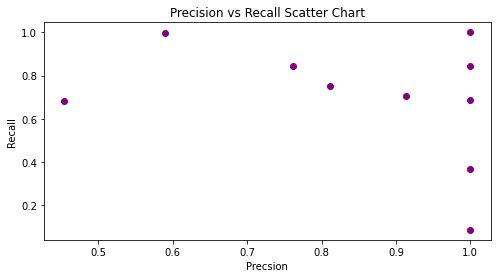



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4694 - accuracy: 0.4571
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8794 - accuracy: 0.6870
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6886 - accuracy: 0.7553
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5224 - accuracy: 0.8244
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.6028 - accuracy: 0.7884
Score for fold 4: loss of 0.602815628051757

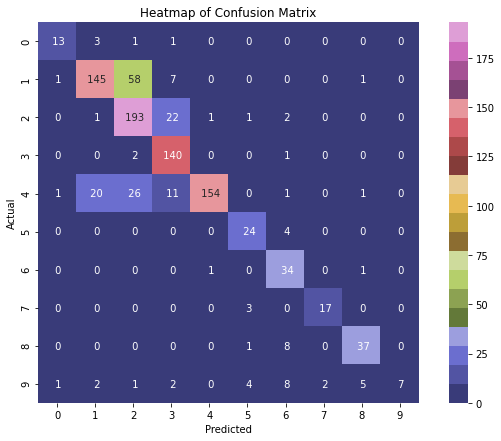

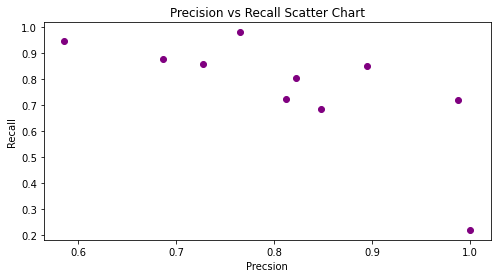



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4712 - accuracy: 0.4533
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9327 - accuracy: 0.6741
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6705 - accuracy: 0.7575
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5267 - accuracy: 0.8156
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.8124 - accuracy: 0.6945
Score for fold 5: loss of 0.812352418899536

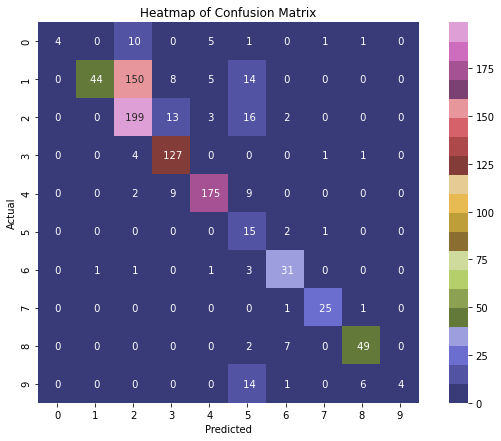

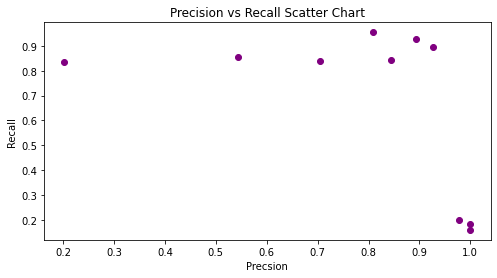



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5024 - accuracy: 0.4352
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9073 - accuracy: 0.6756
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6747 - accuracy: 0.7610
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5655 - accuracy: 0.8055
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.8452
Score for fold 6: loss of 0.487265795469284

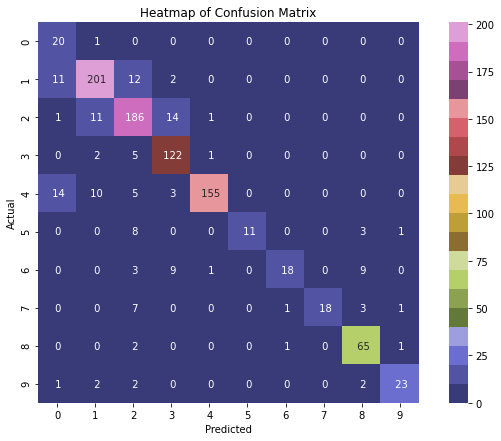

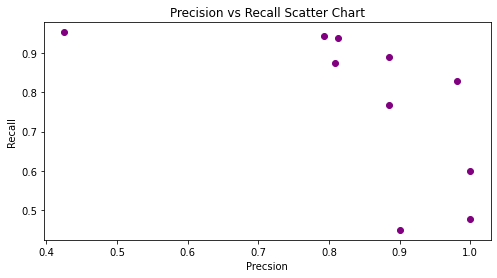



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4222 - accuracy: 0.4720
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.8839 - accuracy: 0.6925
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6060 - accuracy: 0.7939
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.4827 - accuracy: 0.8309
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8545
Score for fold 7: loss of 0.391327887773513

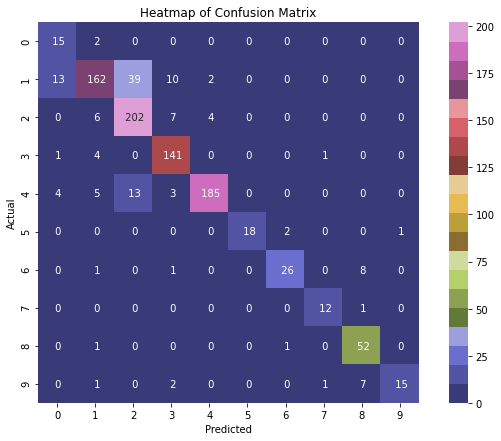

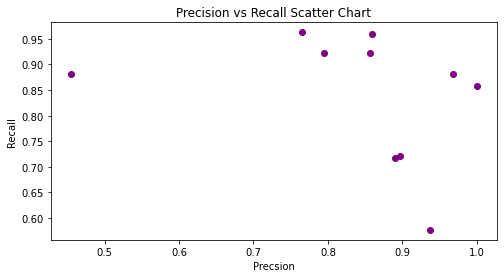



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5019 - accuracy: 0.4438
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9424 - accuracy: 0.6582
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6709 - accuracy: 0.7622
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5289 - accuracy: 0.8161
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.8318
Score for fold 8: loss of 0.453348487615585

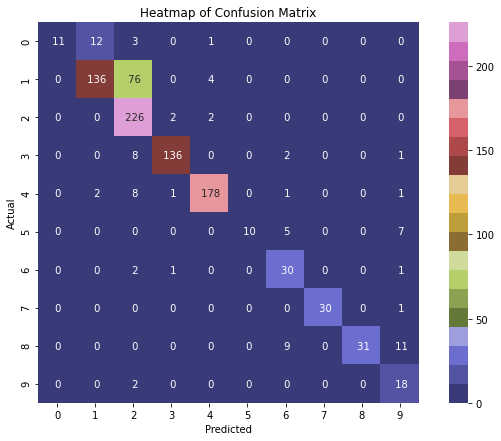

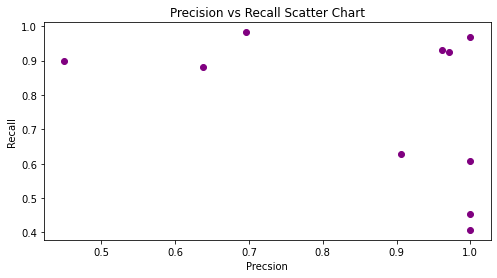



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.5057 - accuracy: 0.4282
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9962 - accuracy: 0.6498
Epoch 3/5
273/273 [==============================] - 5s 17ms/step - loss: 0.6990 - accuracy: 0.7585
Epoch 4/5
273/273 [==============================] - 5s 18ms/step - loss: 0.5112 - accuracy: 0.8222
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.8824
Score for fold 9: loss of 0.346739977598190

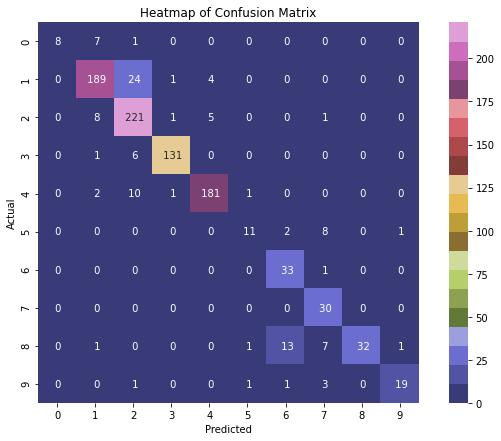

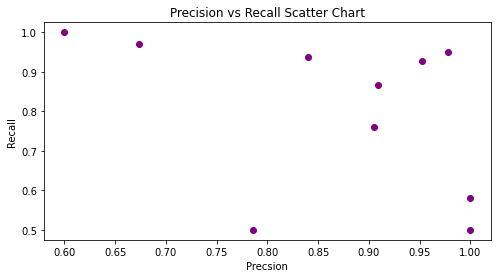



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
273/273 [==============================] - 4s 16ms/step - loss: 1.4453 - accuracy: 0.4571
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.9351 - accuracy: 0.6801
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.6497 - accuracy: 0.7741
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.5412 - accuracy: 0.8145
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 1.2606 - accuracy: 0.5810
Score for fold 10: loss of 1.2605597972869

<ipython-input-5-cc40ee183db9>:69: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


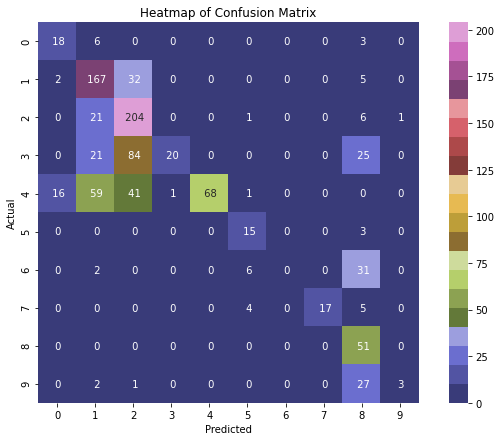

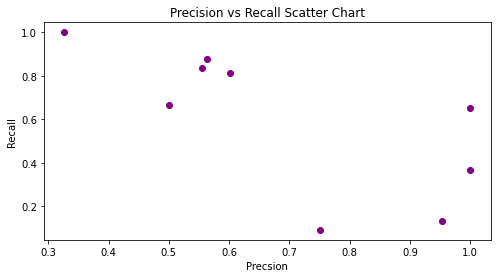



-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
Score per fold: 
> Fold 1 - Loss: 0.3167315423488617 - Accuracy: 89.57688212394714%
-----------------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.3606889545917511 - Accuracy: 88.54489326477051%
-----------------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.6659594774246216 - Accuracy: 77.08978056907654%
-----------------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.6028156280517578 - Accuracy: 78.84417176246643%
---------------------------------------------------------------

In [19]:
neural_network(hidden_layers=2, neurons=100, l_rate=0.01, epochs=5, momentum=0.9)